# Zadanie domowe - EDA Danych dotyczących Titanica

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`26__titanic.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad2`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## <span style="color: #93bf85"> Wstęp

RMS Titanic był jednym z największych i najbardziej luksusowych statków swoich czasów. Należał do linii White Star Line i miał być symbolem nowoczesności oraz bezpieczeństwa. Wypłynął w swój dziewiczy rejs z Southampton (Wielka Brytania) do Nowego Jorku 10 kwietnia 1912 roku. Po drodze zawinął jeszcze do dwóch portów, gdzie na pokład wsiadali pasażerowie:

**Cherbourg** (Francja) – 10 kwietnia 1912, wieczorem. W Cherbourgu na pokład weszło 274 pasażerów, głównie z pierwszej i drugiej klasy.

**Queenstown** (Irlandia) – 11 kwietnia 1912. Na pokład wsiadło 120 pasażerów, głównie z trzeciej klasy. W Queenstown statek opuściło także 7 osób, w tym ojciec Francis Browne, który zrobił jedne z ostatnich zdjęć Titanica przed katastrofą.


<center><img src="https://jezuici.pl/wp-content/uploads/2025/01/2024_001_090-v0001-copy-768x524.webp" alt="Titanic" width="600" height="400"></center>

*<center> „Pełną parą do…,” Titanic opuszczający Queenstown (Cobh), hrabstwo Cork, kwiecień 1912 Muzeum Sztuki Raclin Murphy, Uniwersytet Notre Dame http://www.jezuici.pl </center>*



Na pokładzie znajdowało się około **2200 pasażerów i załogi** – od bogatych arystokratów podróżujących w pierwszej klasie po imigrantów w trzeciej klasie, którzy liczyli na nowe życie w Ameryce.

14 kwietnia 1912 roku, o godzinie **23:40**, Titanic uderzył w górę lodową. Mimo że uznawano go za „niezatapialny”, statek zatonął w ciągu zaledwie 2 godzin i 40 minut, łamiąc się na pół. Katastrofa pochłonęła życie **ponad 1500 osób**, głównie z powodu braku wystarczającej liczby szalup ratunkowych. Ostatecznie **tylko 706 osób przeżyło**.

## <span style="color: #93bf85"> Cel analizy

Katastrofa Titanica była jednym z najbardziej dramatycznych wydarzeń morskich w historii. Dzięki dostępnym danym możemy spojrzeć na tę historię z perspektywy analizy statystycznej i odpowiedzieć na pytanie: **jakie czynniki miały wpływ na szanse przeżycia pasażerów?**  


### 1️ Identyfikacja czynników wpływających na przeżywalność  
- Czy kobiety rzeczywiście miały większe szanse na przeżycie niż mężczyźni?  
- Czy klasa biletu odgrywała istotną rolę w ratowaniu pasażerów?  
- Czy wiek pasażerów miał znaczenie – czy dzieci były ratowane jako pierwsze?  
- Czy podróżowanie z rodziną zwiększało szanse na przeżycie?  

### 2️ Analiza demograficzna pasażerów  
- Jak wyglądał rozkład wieku pasażerów?  
- Skąd pochodziło najwięcej pasażerów?  
- Ilu pasażerów podróżowało samotnie, a ilu z rodzinami?  

### 3️ Analiza ekonomiczna podróży  
- Jakie były ceny biletów w poszczególnych klasach?  
- Czy droższy bilet oznaczał większe szanse na przeżycie?  
- Jakie różnice istniały między pasażerami poszczególnych klas?  

### 4 Analiza logistyczna tragedii  
- Czy miejsce wejścia na pokład (Southampton, Cherbourg, Queenstown) miało wpływ na przeżywalność?  
- Czy rozmieszczenie pasażerów na statku mogło wpłynąć na ich szanse na ratunek?  

### 5️ Wizualizacja danych i interpretacja wyników  
- Przedstawienie najważniejszych zależności za pomocą wykresów i tabel.  
- Sprawdzenie, czy można przewidzieć, kto miał największe szanse na przeżycie.  

---

##  Dlaczego ta analiza jest ważna?  

Chociaż od katastrofy Titanica minął ponad wiek, analiza danych pozwala nam nie tylko lepiej zrozumieć wydarzenia z przeszłości, ale także wyciągnąć wnioski na przyszłość.  

Dzięki EDA możemy nie tylko sprawdzić, które cechy pasażerów miały wpływ na ich los, ale także zwizualizować te zależności w sposób czytelny i przystępny.


## <span style="color: #93bf85"> O Danych


Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład 
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe



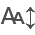

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# <span style="color: #93bf85"> EDA 1 - ogólna analiza danych

In [78]:
df = pd.read_csv('26__titanic.csv', sep=",")
df

pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   
1309     NaN       NaN                                              NaN   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.0000    0.0    0.0   24160  211.3375       B5        S    2   
1       male   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11   
2     female   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
3       male  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
4     female  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
...      ...      ...    ...    ...     ...       ...      ...      ...  ...   
1305  female      NaN    1.0    0.0    2665   14.4542      NaN        C  NaN   
1306    male  26.5000    0.0    0.0    2656    7.2250      NaN        C  NaN   
1307    male  27.0000    0.0    0.0    2670    7.2250      NaN        C  NaN   
1308    male  29.0000    0.0    0.0  315082    7.8750      NaN        S  NaN   
1309     NaN      NaN    NaN    NaN     NaN       NaN      NaN      NaN  NaN   

       body                        home.dest  
0       NaN                     St Louis, MO  
1       NaN  Montreal, PQ / Chesterville, ON  
2       NaN  Montreal, PQ / Chesterville, ON  
3     135.0  Montreal, PQ / Chesterville, ON  
4       NaN  Montreal, PQ / Chesterville, ON  
...     ...                              ...  
1305    NaN                              NaN  
1306  304.0                              NaN  
1307    NaN                              NaN  
1308    NaN                              NaN  
1309    NaN                              NaN  

[1310 rows x 14 columns]

In [79]:
df.shape

(1310, 14)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [81]:
# wyodrębnienie tytułów z kolumny name
df["title"] = df["name"].str.extract(r',\s*([^\.]+)\.')
df

pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   
1309     NaN       NaN                                              NaN   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.0000    0.0    0.0   24160  211.3375       B5        S    2   
1       male   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11   
2     female   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
3       male  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
4     female  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
...      ...      ...    ...    ...     ...       ...      ...      ...  ...   
1305  female      NaN    1.0    0.0    2665   14.4542      NaN        C  NaN   
1306    male  26.5000    0.0    0.0    2656    7.2250      NaN        C  NaN   
1307    male  27.0000    0.0    0.0    2670    7.2250      NaN        C  NaN   
1308    male  29.0000    0.0    0.0  315082    7.8750      NaN        S  NaN   
1309     NaN      NaN    NaN    NaN     NaN       NaN      NaN      NaN  NaN   

       body                        home.dest   title  
0       NaN                     St Louis, MO    Miss  
1       NaN  Montreal, PQ / Chesterville, ON  Master  
2       NaN  Montreal, PQ / Chesterville, ON    Miss  
3     135.0  Montreal, PQ / Chesterville, ON      Mr  
4       NaN  Montreal, PQ / Chesterville, ON     Mrs  
...     ...                              ...     ...  
1305    NaN                              NaN    Miss  
1306  304.0                              NaN      Mr  
1307    NaN                              NaN      Mr  
1308    NaN                              NaN      Mr  
1309    NaN                              NaN     NaN  

[1310 rows x 15 columns]

In [82]:
# Zmiana kolejności kolumn
df = df[['name', 'title', 'sex', 'age', 'survived', 'sibsp', 'parch', 'body', 'pclass', 'cabin', 'fare', 'embarked', 'home.dest', 'boat', 'ticket']]
df

name   title     sex  \
0                       Allen, Miss. Elisabeth Walton    Miss  female   
1                      Allison, Master. Hudson Trevor  Master    male   
2                        Allison, Miss. Helen Loraine    Miss  female   
3                Allison, Mr. Hudson Joshua Creighton      Mr    male   
4     Allison, Mrs. Hudson J C (Bessie Waldo Daniels)     Mrs  female   
...                                               ...     ...     ...   
1305                            Zabour, Miss. Thamine    Miss  female   
1306                        Zakarian, Mr. Mapriededer      Mr    male   
1307                              Zakarian, Mr. Ortin      Mr    male   
1308                               Zimmerman, Mr. Leo      Mr    male   
1309                                              NaN     NaN     NaN   

          age  survived  sibsp  parch   body  pclass    cabin      fare  \
0     29.0000       1.0    0.0    0.0    NaN     1.0       B5  211.3375   
1      0.9167       1.0    1.0    2.0    NaN     1.0  C22 C26  151.5500   
2      2.0000       0.0    1.0    2.0    NaN     1.0  C22 C26  151.5500   
3     30.0000       0.0    1.0    2.0  135.0     1.0  C22 C26  151.5500   
4     25.0000       0.0    1.0    2.0    NaN     1.0  C22 C26  151.5500   
...       ...       ...    ...    ...    ...     ...      ...       ...   
1305      NaN       0.0    1.0    0.0    NaN     3.0      NaN   14.4542   
1306  26.5000       0.0    0.0    0.0  304.0     3.0      NaN    7.2250   
1307  27.0000       0.0    0.0    0.0    NaN     3.0      NaN    7.2250   
1308  29.0000       0.0    0.0    0.0    NaN     3.0      NaN    7.8750   
1309      NaN       NaN    NaN    NaN    NaN     NaN      NaN       NaN   

     embarked                        home.dest boat  ticket  
0           S                     St Louis, MO    2   24160  
1           S  Montreal, PQ / Chesterville, ON   11  113781  
2           S  Montreal, PQ / Chesterville, ON  NaN  113781  
3           S  Montreal, PQ / Chesterville, ON  NaN  113781  
4           S  Montreal, PQ / Chesterville, ON  NaN  113781  
...       ...                              ...  ...     ...  
1305        C                              NaN  NaN    2665  
1306        C                              NaN  NaN    2656  
1307        C                              NaN  NaN    2670  
1308        S                              NaN  NaN  315082  
1309      NaN                              NaN  NaN     NaN  

[1310 rows x 15 columns]

In [83]:
df.head()

name   title     sex      age  \
0                    Allen, Miss. Elisabeth Walton    Miss  female  29.0000   
1                   Allison, Master. Hudson Trevor  Master    male   0.9167   
2                     Allison, Miss. Helen Loraine    Miss  female   2.0000   
3             Allison, Mr. Hudson Joshua Creighton      Mr    male  30.0000   
4  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)     Mrs  female  25.0000   

   survived  sibsp  parch   body  pclass    cabin      fare embarked  \
0       1.0    0.0    0.0    NaN     1.0       B5  211.3375        S   
1       1.0    1.0    2.0    NaN     1.0  C22 C26  151.5500        S   
2       0.0    1.0    2.0    NaN     1.0  C22 C26  151.5500        S   
3       0.0    1.0    2.0  135.0     1.0  C22 C26  151.5500        S   
4       0.0    1.0    2.0    NaN     1.0  C22 C26  151.5500        S   

                         home.dest boat  ticket  
0                     St Louis, MO    2   24160  
1  Montreal, PQ / Chesterville, ON   11  113781  
2  Montreal, PQ / Chesterville, ON  NaN  113781  
3  Montreal, PQ / Chesterville, ON  NaN  113781  
4  Montreal, PQ / Chesterville, ON  NaN  113781

In [84]:
df.tail()

name title     sex   age  survived  sibsp  parch  \
1305      Zabour, Miss. Thamine  Miss  female   NaN       0.0    1.0    0.0   
1306  Zakarian, Mr. Mapriededer    Mr    male  26.5       0.0    0.0    0.0   
1307        Zakarian, Mr. Ortin    Mr    male  27.0       0.0    0.0    0.0   
1308         Zimmerman, Mr. Leo    Mr    male  29.0       0.0    0.0    0.0   
1309                        NaN   NaN     NaN   NaN       NaN    NaN    NaN   

       body  pclass cabin     fare embarked home.dest boat  ticket  
1305    NaN     3.0   NaN  14.4542        C       NaN  NaN    2665  
1306  304.0     3.0   NaN   7.2250        C       NaN  NaN    2656  
1307    NaN     3.0   NaN   7.2250        C       NaN  NaN    2670  
1308    NaN     3.0   NaN   7.8750        S       NaN  NaN  315082  
1309    NaN     NaN   NaN      NaN      NaN       NaN  NaN     NaN

In [85]:
# ostatni wiersz jest pusty, usuwam go

In [86]:
df = df.drop(df.index[-1])
df.tail()

name title     sex   age  survived  sibsp  parch  \
1304       Zabour, Miss. Hileni  Miss  female  14.5       0.0    1.0    0.0   
1305      Zabour, Miss. Thamine  Miss  female   NaN       0.0    1.0    0.0   
1306  Zakarian, Mr. Mapriededer    Mr    male  26.5       0.0    0.0    0.0   
1307        Zakarian, Mr. Ortin    Mr    male  27.0       0.0    0.0    0.0   
1308         Zimmerman, Mr. Leo    Mr    male  29.0       0.0    0.0    0.0   

       body  pclass cabin     fare embarked home.dest boat  ticket  
1304  328.0     3.0   NaN  14.4542        C       NaN  NaN    2665  
1305    NaN     3.0   NaN  14.4542        C       NaN  NaN    2665  
1306  304.0     3.0   NaN   7.2250        C       NaN  NaN    2656  
1307    NaN     3.0   NaN   7.2250        C       NaN  NaN    2670  
1308    NaN     3.0   NaN   7.8750        S       NaN  NaN  315082

In [87]:
df.sample(10, random_state=123)

name title     sex      age  \
1244  Thomas, Mrs. Alexander (Thamine "Thelma")   Mrs  female  16.0000   
798                           Finoli, Mr. Luigi    Mr    male      NaN   
437                         Herman, Miss. Alice  Miss  female  24.0000   
84                    Cumings, Mr. John Bradley    Mr    male  39.0000   
1307                        Zakarian, Mr. Ortin    Mr    male  27.0000   
266                  Smart, Mr. John Montgomery    Mr    male  56.0000   
590                       West, Miss. Barbara J  Miss  female   0.9167   
1094                           Osman, Mrs. Mara   Mrs  female  31.0000   
1009                        McMahon, Mr. Martin    Mr    male      NaN   
1078              O'Dwyer, Miss. Ellen "Nellie"  Miss  female      NaN   

      survived  sibsp  parch  body  pclass cabin     fare embarked  \
1244       1.0    1.0    1.0   NaN     3.0   NaN   8.5167        C   
798        1.0    0.0    0.0   NaN     3.0   NaN   7.0500        S   
437        1.0    1.0    2.0   NaN     2.0   NaN  65.0000        S   
84         0.0    1.0    0.0   NaN     1.0   C85  71.2833        C   
1307       0.0    0.0    0.0   NaN     3.0   NaN   7.2250        C   
266        0.0    0.0    0.0   NaN     1.0   NaN  26.5500        S   
590        1.0    1.0    2.0   NaN     2.0   NaN  27.7500        S   
1094       1.0    0.0    0.0   NaN     3.0   NaN   8.6833        S   
1009       0.0    0.0    0.0   NaN     3.0   NaN   7.7500        Q   
1078       1.0    0.0    0.0   NaN     3.0   NaN   7.8792        Q   

                         home.dest boat              ticket  
1244                           NaN   14                2625  
798         Italy Philadelphia, PA   15  SOTON/O.Q. 3101308  
437   Somerset / Bernardsville, NJ    9              220845  
84                    New York, NY  NaN            PC 17599  
1307                           NaN  NaN                2670  
266                   New York, NY  NaN              113792  
590            Bournmouth, England   10          C.A. 34651  
1094                           NaN  NaN              349244  
1009                           NaN  NaN              370372  
1078                           NaN  NaN              330959

In [88]:
#sprawdzam duplikaty
df.duplicated().sum()

0

In [89]:
# sprawdzam wartości unikatowe

In [90]:
df.nunique()

name         1307
title          18
sex             2
age            98
survived        2
sibsp           7
parch           8
body          121
pclass          3
cabin         186
fare          281
embarked        3
home.dest     369
boat           27
ticket        929
dtype: int64

# <span style="color: #93bf85"> EDA2  - analiza brakujacych wartości

In [92]:
#sprawdzam brakujące wartości
df.isnull().sum().reset_index(name='Ilość')

index  Ilość
0        name      0
1       title      0
2         sex      0
3         age    263
4    survived      0
5       sibsp      0
6       parch      0
7        body   1188
8      pclass      0
9       cabin   1014
10       fare      1
11   embarked      2
12  home.dest    564
13       boat    823
14     ticket      0

##### <span style="color:  #93bf99"> W zbiorze danych występują brakujące wartości w następujących kolumnach:

**age** – brakujące dane dla 263 pasażerów, co stanowi około 20% wszystkich obserwacji. Możliwe, że brak wieku może wynikać z niepełnych zapisów podczas rejestracji pasażerów.

**body** – brakujące dane dla 1188 pasażerów, ponieważ tylko pasażerowie, którzy nie przeżyli katastrofy, mieli przypisany numer ciała. Pasażerowie, którzy przeżyli, nie mają tych informacji. Ewentualnie ciało nie zostało odnalezione lub nie nadano numeru.

**cabin** – brakujące dane dla 1014 pasażerów. Wiele osób podróżowało w trzeciej klasie, gdzie nie było przypisanych kabin, lub dane te zostały po prostu pominięte.

**fare** – brakujące dane dla 1 pasażera. Brak jednej wartości w tej kolumnie sugeruje, że jest to rzadki przypadek, który nie wpłynie znacząco na analizę. Pasażer mógł być zwolniony z opłaty lub zapis mógł być błędny.

**embarked** – brakujące dane dla 2 pasażerów. Dwa brakujące wpisy są niewielką liczbą w stosunku do całości danych. Pasażerowie mogli mieć nietypowy lub niestandardowy sposób zaokrętowania, a brakujące dane mogą wynikać z błędów w rejestrze.


**home.dest** – brakujące dane dla 564 pasażerów. Jest to znaczna część danych. Może to wynikać z niepełnych zapisów pasażerskich lub faktu, że niektóre osoby nie miały jasno określonego celu podróży (np. emigranci szukający nowego życia). Duża liczba braków sprawia, że bezpośrednie usunięcie tych wierszy nie jest dobrą opcją, ponieważ moglibyśmy utracić cenne informacje o tych pasażerach w innych kolumnach. Wydaje się, że home.dest nie jest kluczową zmienną w analizie, można pozostawić wartości NaN. Dla ułatwienia interpretacji danych zamiast NaN przypiszemy "Brak informacji",

**boat** – Kolumna boat odnosi się do numerów łodzi ratunkowych, do których pasażerowie zostali przypisani lub do których udało im się wejść. Brakujące dane dla 823 pasażerów, czyli około 60% danych w tej kolumnie. To dość duża liczba, braki mogą wynikać z tego, że nie wszyscy pasażerowie dotarli do łodzi ratunkowych lub nie zapisano ich w rejestrze. Wielu pasażerów nie przeżyło katastrofy lub po prostu nie zostało przypisanych do żadnej łodzi ratunkowej, co może wyjaśniać brak tej informacji.


# <span style="color: #93bf85"> EDA3  - transformacja danych

Po przeprowadzeniu ogólnej analizy danych oraz identyfikacji brakujących wartości, kolejnym krokiem będzie transformacja danych. Jej celem jest przygotowanie zbioru do dalszej analizy, eliminacja problemów wynikających z niespójności danych oraz poprawa ich jakości.

Transformacja danych w przypadku zbioru Titanica jest kluczowa, ponieważ brakujące wartości w niektórych kolumnach mogą prowadzić do błędnej interpretacji wyników, dlatego należy je odpowiednio uzupełnić lub usunąć.

Dzięki odpowiedniej transformacji dane będą bardziej jednorodne i gotowe do głębszej analizy, w tym do identyfikacji zależności między zmiennymi.

In [93]:
df['age'].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

Średnia wieku to ok. 30 lat, mediana wynosi 28 lat. Brakujące dane zostaną uzupełnione medianą. Wiek na Titanicu nie był skrajnie zróżnicowany, co oznacza, że imputacja brakujących danych o wiek za pomocą mediany nie będzie wprowadzała dużych zniekształceń w rozkładzie. Mediana będzie bardziej reprezentatywna niż średnia, ponieważ nie jest wrażliwa na skrajne wartości.

In [94]:
df_copy = df.copy()
df_copy['age'].fillna(df_copy['age'].median(), inplace=True)

Wartość NaN w kolumnie body niesie ze sobą znaczenie, dlatego zamiast ją usuwać czy ignorować, przekształcimy ją w bardziej czytelną kategorię body_status a wartości NaN  opiszemy jako "Brak numeru (przeżył lub nieodnaleziony)".

In [95]:
df_copy['body_status'] = df_copy['body'].apply(lambda x: x if pd.notnull(x) else 'Brak numeru (przeżył lub nieodnaleziony)')

NaN w kolumnie cabin oznacza brak przypisania kabiny lub brak danych - zmieniamy na 'Nieprzydzielona'

In [96]:
df_copy['cabin'] = df_copy['cabin'].fillna('Nieprzydzielona')

Wartość Nan w kolumnie fare występuje tylko raz, uzupełnimy ją medianą

In [97]:
df_copy['fare'] = df_copy['fare'].fillna(df_copy['fare'].median())

W kolumnie embarked brakuje danych dla 2 osób, uzupełniamy informacje najczęściej występującym portem zaokrętowania.

In [98]:
df_copy['embarked'] = df_copy['embarked'].fillna(df_copy['embarked'].mode()[0])

W kolumnie boat NaN oznacza brak przypisanej łodzi ratunkowej. Zamieniamy na "Brak informacji (nie przypisano łodzi)".

In [99]:
df_copy['boat'] = df_copy['boat'].fillna('Brak informacji (nie przypisano łodzi)')

Ostatnia zmiana dotyczy kolumny home.dest gdzie NaN = brak celu podróży – nie został podany. Dla większej czytelności zmieniamy na "Nieznany".

In [100]:
df_copy['home.dest'] = df_copy['home.dest'].fillna('Nieznany')

In [101]:
df_copy.isnull().sum().reset_index(name='Ilość')

index  Ilość
0          name      0
1         title      0
2           sex      0
3           age      0
4      survived      0
5         sibsp      0
6         parch      0
7          body   1188
8        pclass      0
9         cabin      0
10         fare      0
11     embarked      0
12    home.dest      0
13         boat      0
14       ticket      0
15  body_status      0

# <span style="color: #93bf85"> EDA4  - analiza pojedynczych zmiennych

In [102]:
df_copy

name   title     sex  \
0                       Allen, Miss. Elisabeth Walton    Miss  female   
1                      Allison, Master. Hudson Trevor  Master    male   
2                        Allison, Miss. Helen Loraine    Miss  female   
3                Allison, Mr. Hudson Joshua Creighton      Mr    male   
4     Allison, Mrs. Hudson J C (Bessie Waldo Daniels)     Mrs  female   
...                                               ...     ...     ...   
1304                             Zabour, Miss. Hileni    Miss  female   
1305                            Zabour, Miss. Thamine    Miss  female   
1306                        Zakarian, Mr. Mapriededer      Mr    male   
1307                              Zakarian, Mr. Ortin      Mr    male   
1308                               Zimmerman, Mr. Leo      Mr    male   

          age  survived  sibsp  parch   body  pclass            cabin  \
0     29.0000       1.0    0.0    0.0    NaN     1.0               B5   
1      0.9167       1.0    1.0    2.0    NaN     1.0          C22 C26   
2      2.0000       0.0    1.0    2.0    NaN     1.0          C22 C26   
3     30.0000       0.0    1.0    2.0  135.0     1.0          C22 C26   
4     25.0000       0.0    1.0    2.0    NaN     1.0          C22 C26   
...       ...       ...    ...    ...    ...     ...              ...   
1304  14.5000       0.0    1.0    0.0  328.0     3.0  Nieprzydzielona   
1305  28.0000       0.0    1.0    0.0    NaN     3.0  Nieprzydzielona   
1306  26.5000       0.0    0.0    0.0  304.0     3.0  Nieprzydzielona   
1307  27.0000       0.0    0.0    0.0    NaN     3.0  Nieprzydzielona   
1308  29.0000       0.0    0.0    0.0    NaN     3.0  Nieprzydzielona   

          fare embarked                        home.dest  \
0     211.3375        S                     St Louis, MO   
1     151.5500        S  Montreal, PQ / Chesterville, ON   
2     151.5500        S  Montreal, PQ / Chesterville, ON   
3     151.5500        S  Montreal, PQ / Chesterville, ON   
4     151.5500        S  Montreal, PQ / Chesterville, ON   
...        ...      ...                              ...   
1304   14.4542        C                         Nieznany   
1305   14.4542        C                         Nieznany   
1306    7.2250        C                         Nieznany   
1307    7.2250        C                         Nieznany   
1308    7.8750        S                         Nieznany   

                                        boat  ticket  \
0                                          2   24160   
1                                         11  113781   
2     Brak informacji (nie przypisano łodzi)  113781   
3     Brak informacji (nie przypisano łodzi)  113781   
4     Brak informacji (nie przypisano łodzi)  113781   
...                                      ...     ...   
1304  Brak informacji (nie przypisano łodzi)    2665   
1305  Brak informacji (nie przypisano łodzi)    2665   
1306  Brak informacji (nie przypisano łodzi)    2656   
1307  Brak informacji (nie przypisano łodzi)    2670   
1308  Brak informacji (nie przypisano łodzi)  315082   

                                   body_status  
0     Brak numeru (przeżył lub nieodnaleziony)  
1     Brak numeru (przeżył lub nieodnaleziony)  
2     Brak numeru (przeżył lub nieodnaleziony)  
3                                        135.0  
4     Brak numeru (przeżył lub nieodnaleziony)  
...                                        ...  
1304                                     328.0  
1305  Brak numeru (przeżył lub nieodnaleziony)  
1306                                     304.0  
1307  Brak numeru (przeżył lub nieodnaleziony)  
1308  Brak numeru (przeżył lub nieodnaleziony)  

[1309 rows x 16 columns]

### <span style="color:  #93bf99"> Imię i nazwisko (name, title)

Oprócz imienia i nazwiska kolumna zawiera skróty / tytuły, które oznaczają formy grzecznościowe lub tytuły używane w krajach, z których pochodzili pasażerowie Titanica. Zostały wyodrębnione w oddzielnej kolumnie w celu dodatkowej analizy

In [103]:
df_copy['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

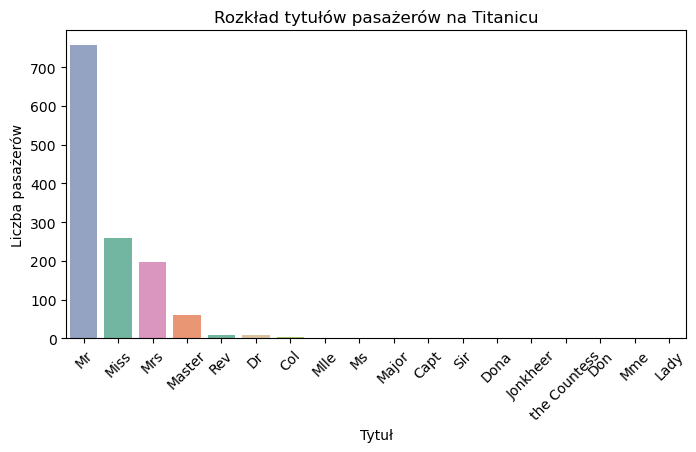

In [104]:
# Ustawienie wielkości wykresu
plt.figure(figsize=(8, 4))

# Wykres słupkowy tytułów pasażerów
sns.countplot(data=df_copy, x='title', order=df_copy['title'].value_counts().index, hue='title', legend=False, palette='Set2')

# Dostosowanie wykresu
plt.title('Rozkład tytułów pasażerów na Titanicu')
plt.xlabel('Tytuł')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=45)  # Obrót etykiet dla lepszej czytelności

# Wyświetlenie wykresu
plt.show()

Najczęściej występujące tytuły:

"Mr" (Pan) – najliczniejsza grupa, co wskazuje na dużą liczbę dorosłych mężczyzn.

"Miss" (Panna) i "Mrs" (Pani) – dominują wśród kobiet.

"Master" – odnosi się do chłopców (niepełnoletnich mężczyzn).


Tytuły wojskowe i szlacheckie:

"Col", "Major", "Capt" – tytuły wojskowe, oznaczające pasażerów wysokiej rangi.

"Dr" – doktor (medycyny lub akademicki)

"Sir", "Lady", "the Countess" – tytuły arystokratyczne, pojawiające się rzadko.


Tytuły zagraniczne i nietypowe:

"Mme", "Mlle" – francuskie odpowiedniki „Pani” i „Panny”.

"Don", "Dona" – hiszpańskie tytuły szlacheckie.

"Jonkheer" – niderlandzki tytuł szlachecki.

Dla poprawienia czytelności wykresu i ułatwienia dalszej analizy dokonamy pewnych transformacji

Część tytłów saclimy (np. "Mme" → "Mrs", "Mlle" → "Miss"), a tytuły wojskowe i arystokratyczne połączymy w kategorię „Elita” dla lepszej analizy.

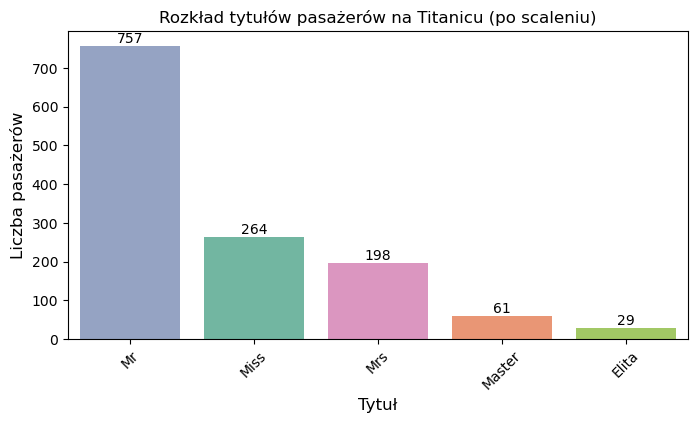

In [105]:
# Grupowanie tytułów
title_mapping = {
    'Mme': 'Mrs', 'Mlle': 'Miss',  # Scalanie francuskich odpowiedników
    'Don': 'Elita', 'Dona': 'Elita', 'Lady': 'Elita', 'Sir': 'Elita', 'Jonkheer': 'Elita', 'the Countess': 'Elita',
    'Col': 'Elita', 'Major': 'Elita', 'Capt': 'Elita', 'Rev': 'Elita', 'Dr': 'Elita',  # Tytuły wojskowe i duchowne
    'Ms': 'Miss'  # Ms jako odpowiednik Miss/Mrs
}

# Zamiana tytułów według mapowania
df_copy['title'] = df_copy['title'].replace(title_mapping)

# Ustawienie wielkości wykresu
plt.figure(figsize=(8, 4))

# Tworzenie wykresu
ax = sns.countplot(
    data=df_copy, 
    x='title', 
    order=df_copy['title'].value_counts().index, 
    hue='title', 
    legend=False, 
    palette='Set2'
)

# Dodanie liczby osób nad słupkami
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

# Dostosowanie wykresu
plt.title('Rozkład tytułów pasażerów na Titanicu (po scaleniu)', fontsize=12)
plt.xlabel('Tytuł', fontsize=12)
plt.ylabel('Liczba pasażerów', fontsize=12)
plt.xticks(rotation=45)  # Obrót etykiet dla lepszej czytelności

# Wyświetlenie wykresu
plt.show()

"Mr" nadal dominuje – większość pasażerów to mężczyźni, co pokazuje, że na pokładzie było znacznie więcej dorosłych mężczyzn niż innych grup.

"Miss" i "Mrs" to główne grupy wśród kobiet – połączenie Mme → Mrs oraz Mlle, Ms → Miss nie zmieniło ich dominacji.

"Master" to jedyny tytuł dla chłopców – potwierdza podział na dzieci i dorosłych.

"Elita" to mała, ale znacząca grupa – składa się z arystokratów, wojskowych i duchownych. Ich liczba jest niewielka, ale warto sprawdzić ich przeżywalność.

### <span style="color:  #93bf99"> Płeć pasażera (sex)

In [106]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

**male** - mężczyzna,

**female** - kobieta

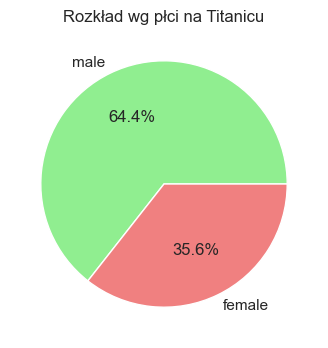

In [163]:
# Zliczenie liczby pasażerów według płci
sex_counts = df_copy['sex'].value_counts()


plt.figure(figsize=(4,4))
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral']) 
plt.title('Rozkład wg płci na Titanicu')
plt.ylabel('')  # Ukrycie etykiety na osi Y
plt.show()

Na pokładzie Titanica dominowali mężczyźni, stanowili oni 64,4 % pasażerów.

Kobiety stanowiły 35,6 % pasażerów.

### <span style="color:  #93bf99"> Wiek pasażera (age)


In [108]:
mean_age = df_copy['age'].mean().round()
min_age = df_copy['age'].min()
max_age = df_copy['age'].max()

print(f"Średnia wieku pasażerów: {mean_age}")
print(f"Wiek najmłodszego pasażera: {min_age}")
print(f"Wiek najstarszego pasażera: {max_age}")

Średnia wieku pasażerów: 30.0
Wiek najmłodszego pasażera: 0.1667
Wiek najstarszego pasażera: 80.0


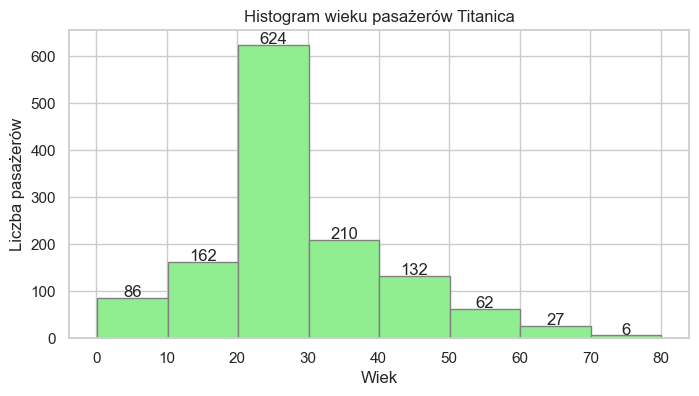

In [166]:
# Tworzenie histogramu
plt.figure(figsize=(8, 4))
counts, bins, patches = plt.hist(df_copy['age'], bins=8, color='lightgreen', edgecolor='grey')

# Dodanie liczby pasażerów nad słupkami
for count, bin_edge in zip(counts, bins[:-1]):
    plt.text(bin_edge + (bins[1] - bins[0]) / 2, count + 2, str(int(count)), ha='center', fontsize=12)

# Dodanie etykiet
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')
plt.title('Histogram wieku pasażerów Titanica')

# Wyświetlenie wykresu
plt.show()

Na Titanicu wiek pasażerów nie był skrajnie zróżnicowany. Większość pasażerów to dorośli, a liczba dzieci i osób starszych była stosunkowo mniejsza. Największą grupą pasażerów były osoby w wieku między 20-30 lat - ponad 600 osób.

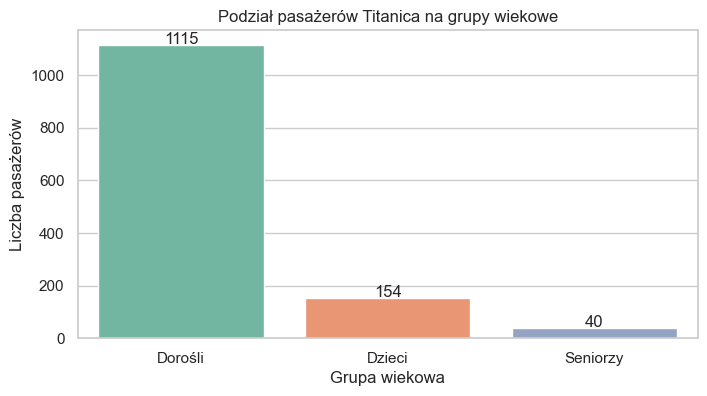

In [167]:
# Definicja przedziałów wiekowych
def categorize_age(age):
    if age < 18:
        return 'Dzieci'
    elif age < 60:
        return 'Dorośli'
    else:
        return 'Seniorzy'

# Tworzenie nowej kolumny z kategoriami wiekowymi
df_copy['age_group'] = df_copy['age'].apply(categorize_age)

# Zliczenie pasażerów w każdej grupie
age_counts = df_copy['age_group'].value_counts().reset_index()
age_counts.columns = ['Grupa wiekowa', 'Liczba pasażerów']

# Tworzenie wykresu słupkowego
plt.figure(figsize=(8,4))
sns.barplot(x='Grupa wiekowa', y='Liczba pasażerów', data=age_counts, hue='Grupa wiekowa', palette='Set2', legend=False)

# Dodanie etykiet nad słupkami
for i, value in enumerate(age_counts['Liczba pasażerów']):
    plt.text(i, value + 5, str(value), ha='center', fontsize=12)

# Opisy osi
plt.xlabel('Grupa wiekowa')
plt.ylabel('Liczba pasażerów')
plt.title('Podział pasażerów Titanica na grupy wiekowe')

plt.show()

**Rozkład wieku na Titanicu:**

Większość pasażerów to byli dorośli, z przewagą osób w przedziale wiekowym 20-50 lat. Wiek średni pasażerów wynosił około 30 lat.

Na pokładzie Titanica były również dzieci, ale ich liczba stanowiła mniejszość.

Wśród pasażerów byli także seniorzy, jednak ich liczba była również niewielka w porównaniu z dorosłymi pasażerami.

### <span style="color:  #93bf99"> Czy pasażer przeżył katastrofę? (survived)

In [111]:
df['survived'].unique()

array([1., 0.])

**1** - przeżył

**0** - nie przeżył, 

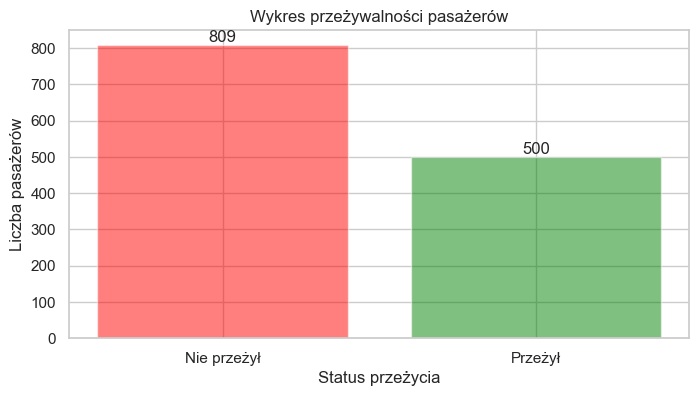

In [168]:
# Zliczam liczbę ocalałych i nieocalałych
survival_counts = df_copy['survived'].value_counts()

# Tworzę wykres słupkowy
plt.figure(figsize=(8, 4))
bars = plt.bar(['Nie przeżył', 'Przeżył'], survival_counts, color=['red', 'green'], alpha=0.5)

# Dodaję liczby nad słupkami
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Ustawiam etykiety
plt.xlabel('Status przeżycia')
plt.ylabel('Liczba pasażerów')
plt.title('Wykres przeżywalności pasażerów');

**Na 1309 osób przeżyło 500, co stanowi około 40% (38,17%) pasażerów. Większość pasażerów zginęła.**

### <span style="color:  #93bf99"> Ilu pasażerów podróżowało samotnie, a ilu z rodzinami? (sibsp, parch)
##### <span style="color:  #93bf99"> Liczba rodzeństwa/małżonków na pokładzie (sibsp)

##### <span style="color:  #93bf99"> Liczba rodziców/dzieci na pokładzie (parch)


Przykładowa interpretacja dla **sibsp** i **parch**

| Passenger         | sibsp | parch | Znaczenie |
|------------------|------|------|-----------------------------------------------|
| Jan Kowalski    | 0    | 0    | Podróżował samotnie, bez rodziny.             |
| Anna Nowak      | 1    | 0    | Miała na pokładzie męża/żonę lub jedno rodzeństwo. |
| Piotr Wiśniewski| 0    | 2    | Podróżował z dwójką rodziców.                 |
| Maria Lewandowska | 2  | 3    | Była na pokładzie z dwójką rodzeństwa/małżonkiem oraz trójką dzieci/rodziców. |



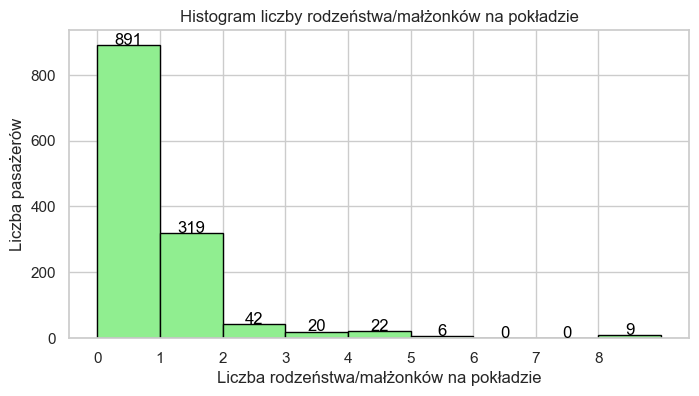

In [169]:
# Obliczenie liczby pasażerów podróżujących samotnie oraz z rodziną
alone_count = df_copy[df_copy['sibsp'] == 0].shape[0]
with_family_count = df_copy[df_copy['sibsp'] > 0].shape[0]

# Tworzenie histogramu liczby rodzeństwa/małżonków na pokładzie
plt.figure(figsize=(8, 4))
n, bins, patches = plt.hist(df_copy['sibsp'], bins=range(int(df_copy['sibsp'].max()) + 2), color='lightgreen', edgecolor='black')

# Dodanie wartości nad słupkami
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, 
             n[i] + 1,  # Umieszczenie tekstu nieco powyżej słupka
             int(n[i]),  # Liczba pasażerów w danym przedziale
             ha='center', fontsize=12, color='black')

# Dodanie tytułu i etykiet osi
plt.title('Histogram liczby rodzeństwa/małżonków na pokładzie')
plt.xlabel('Liczba rodzeństwa/małżonków na pokładzie')
plt.ylabel('Liczba pasażerów')
plt.xticks(range(int(df_copy['sibsp'].max()) + 1))

# Wyświetlenie wykresu
plt.show()

Jak widać większość pasażerów podróżowała samotnie – najczęstsza wartość na histogramie to 0, co oznacza, że duża liczba osób nie miała na pokładzie ani rodzeństwa, ani małżonka.

Kilkadziesiąt osób podróżowało z większą rodziną – występują wartości powyżej 1, co wskazuje, że część pasażerów podróżowała w grupach rodzinnych, choć były to raczej wyjątki.


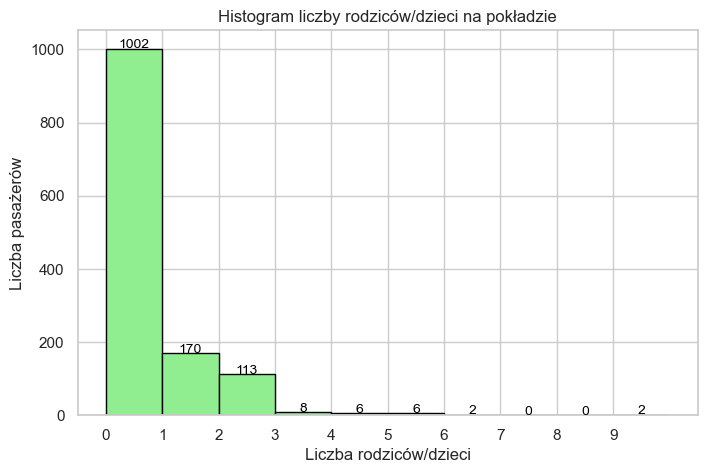

In [208]:
# Tworzenie histogramu dla kolumny 'parch'
plt.figure(figsize=(8, 5))

# Ustalamy odpowiednie przedziały dla histogramu
n, bins, patches = plt.hist(df_copy['parch'], 
                            bins=range(int(df_copy['parch'].min()), int(df_copy['parch'].max()) + 2), 
                            color='lightgreen', 
                            edgecolor='black')

# Dodanie wartości nad słupkami
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, 
             n[i] + 1,  # Umieszczamy nieco powyżej słupka
             int(n[i]),  # Liczba pasażerów w danym przedziale
             ha='center', fontsize=10, color='black')

# Dodanie tytułu i etykiet osi
plt.title('Histogram liczby rodziców/dzieci na pokładzie')
plt.xlabel('Liczba rodziców/dzieci')
plt.ylabel('Liczba pasażerów')

# Ustawienie etykiet na osi X, aby pasowały do liczb
plt.xticks(range(int(df_copy['parch'].min()), int(df_copy['parch'].max()) + 1))

# Wyświetlenie wykresu
plt.show()

Największa częstotliwość występuje przy wartości 0, co oznacza, że większość osób nie miała na pokładzie ani rodziców, ani dzieci.

Mała liczba pasażerów podróżowała z większą rodziną – wartości powyżej 1 są znacznie rzadsze, co sugeruje, że osoby podróżujące z dziećmi lub rodzicami stanowiły mniejszość.

Podobny trend jak w przypadku rodzeństwa/małżonków.

### <span style="color:  #93bf99"> Numer ciała (body)

Jeśli pasażer nie przeżył, a jego ciało zostało odnalezione, otrzymał numer identyfikacyjny.

In [115]:
df['body'].unique()

array([ nan, 135.,  22., 124., 148., 208., 172., 269.,  62., 133., 275.,
       147., 110., 307.,  38.,  80.,  45., 258., 126., 292., 175., 249.,
       230., 122., 263., 234., 189., 166., 207., 232.,  16., 109.,  96.,
        46., 245., 169., 174.,  97.,  18., 130.,  17., 295., 286., 236.,
       322., 297., 155., 305.,  19.,  75.,  35., 256., 149., 283., 165.,
       108., 121.,  52., 209., 271.,  43.,  15., 101., 287.,  81., 294.,
       293., 190.,  72., 103.,  79., 259., 260., 142., 299., 171.,   9.,
       197.,  51., 187.,  68.,  47.,  98., 188.,  69., 306., 120., 143.,
       156., 285.,  37.,  58.,  70., 196., 153.,  61.,  53., 201., 309.,
       181., 173.,  89.,   4., 206., 327., 119.,   7.,  32.,  67., 284.,
       261., 176.,  50.,   1., 255., 298., 314.,  14., 131., 312., 328.,
       304.])

In [116]:
# Sprawdzenie liczby znanych i brakujących wartości w kolumnie 'body'
missing_body = df_copy['body'].isna().sum()
known_body = df_copy['body'].count()

print(f"Liczba odnalezionych ciał: {known_body}")
print(f"Liczba osób, których ciał nie odnaleziono: {missing_body}")

Liczba odnalezionych ciał: 121
Liczba osób, których ciał nie odnaleziono: 1188


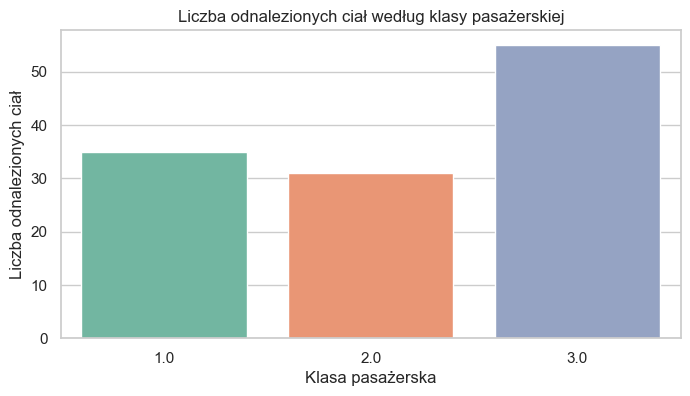

In [171]:
plt.figure(figsize=(8, 4))
sns.countplot(x='pclass', hue='pclass', data=df_copy[df_copy['body'].notna()], palette='Set2', legend=False)
plt.title('Liczba odnalezionych ciał według klasy pasażerskiej')
plt.xlabel('Klasa pasażerska')
plt.ylabel('Liczba odnalezionych ciał')
plt.show()

Widać, że trzecia klasa miała największą liczbę odnalezionych ciał. W porównaniu do innych klas, odsetek ofiar w 3 klasie był najwyższy, stąd też największa liczba ciał pasażerów 3 klasy.

Pierwsza i druga klasa miały zdecydowanie mniejszą liczbę odnalezionych ciał. W porównaniu do 3 klasy, liczba ofiar w tych klasach była znacznie niższa, co może świadczyć o wyższym poziomie bezpieczeństwa i łatwiejszym dostępie do ewakuacji dla pasażerów tych klas.

###  <span style="color:  #93bf99"> Klasa biletu (pclass)

In [118]:
df['pclass'].unique()

array([1., 2., 3.])

Na Titanicu istniały trzy klasy biletów, które odzwierciedlały status społeczny pasażerów oraz warunki podróży.


| pclass | Opis            | Koszt biletu          | Lokalizacja na statku   |
|--------|----------------|-------------------------|-------------------------|
| 1      | Pierwsza klasa  | najdroższe      | Górne pokłady (A, B, C) |
| 2      | Druga klasa     | średnie          | Środkowe pokłady (D, E) |
| 3      | Trzecia klasa   | najtańsze        | Dolne pokłady (F, G)    |



<u>**Pierwsza klasa** </u>(pclass = 1)

- Luksusowe apartamenty i prywatne kabiny.
  
- Bogaci pasażerowie: przemysłowcy, politycy, celebryci.

  
- Dostęp do ekskluzywnych jadalni, sal balowych, bibliotek i siłowni.

  
- Największe szanse na przeżycie – znajdowali się bliżej pokładów ratunkowych.

  
 
 **Cena biletu**: od 30 funtów do ponad 800 funtów (w przeliczeniu na dzisiejsze pieniądze to kilkadziesiąt tysięcy dolarów!).



<u>**Druga klasa**</u> (pclass = 2)

- Komfortowe kabiny, ale mniej luksusowe niż w pierwszej klasie.
  
- Przewożeni głównie średnia klasa społeczna, m.in. nauczyciele, lekarze, duchowni.

  
- Posiadali własne jadalnie, ale mniej ekskluzywne niż w pierwszej klasie.

  
- Szanse na przeżycie były średnie – znajdowali się na środkowych pokładach.

  

 **Cena biletu**: ok. 13 funtów (ok. 1 500 dolarów dzisiaj).



<u>**Trzecia klasa**</u> (pclass = 3)

- Największa grupa pasażerów – głównie emigranci (z Irlandii, Skandynawii, Europy Wschodniej).

  
  
- Kabiny były ciasne, wieloosobowe, często dzielone z obcymi osobami.

  

- Znajdowali się w najniższej części statku, co utrudniało dostęp do szalup ratunkowych.

  

- Najmniejsze szanse na przeżycie – wiele osób zostało uwięzionych, gdy statek tonął.

  

**Cena biletu**: od 7 funtów (ok. 800 dolarów dzisiaj).


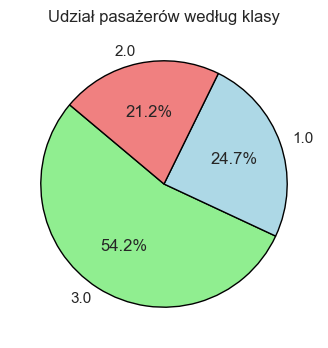

In [172]:
# Obliczenie liczby pasażerów w każdej klasie
class_counts = df_copy['pclass'].value_counts()

# Tworzenie wykresu kołowego
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', 
        colors=['lightgreen', 'lightblue', 'lightcoral'], startangle=140, wedgeprops={'edgecolor': 'black'})
        
# Dodanie tytułu
plt.title('Udział pasażerów według klasy')

# Wyświetlenie wykresu
plt.show()

Najwięcej pasażerów podróżowało w 3 klasie – Prawdopodobnie większość pasażerów stanowili osoby z niższych warstw społecznych, co zgadza się z historycznymi danymi o Titanicu.

Pasażerów 1 klasy było najmniej – byli to głównie bogatsi pasażerowie, którzy mieli lepsze warunki podróży.
Udział pasażerów 2 klasy był pośredni – było ich mniej niż w 3 klasie, ale więcej niż w 1 klasie.

Dysproporcja między klasami – widać wyraźnie, że Titanic przewoził głównie osoby z 3 klasy.

### <span style="color:  #93bf99"> Numer kabiny (cabin)

In [120]:
df['cabin'].unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

Możemy zobaczyć, ile pasażerów miało przypisaną kabinę, a ilu nie.

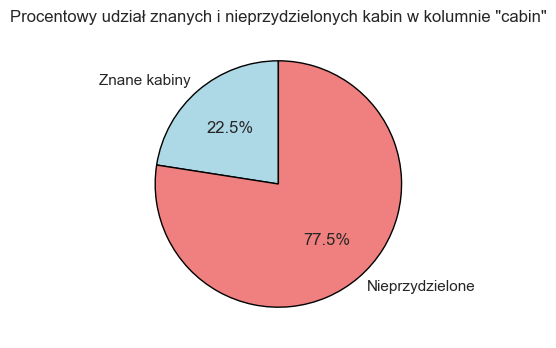

In [173]:
# Obliczenie liczby znanych i brakujących wartości
missing_cabin = (df_copy['cabin'] == 'Nieprzydzielona').sum()
known_cabin = (df_copy['cabin'] != 'Nieprzydzielona').sum()

# Tworzenie wykresu kołowego
plt.figure(figsize=(4, 4))
plt.pie([known_cabin, missing_cabin], labels=['Znane kabiny', 'Nieprzydzielone'], 
        autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Procentowy udział znanych i nieprzydzielonych kabin w kolumnie "cabin"')
plt.show()

Większość pasażerów nie miała przypisanej kabiny. Możliwe, że kabiny były przypisywane głównie pasażerom 1 klasy. 

Kabiny miały oznaczenia literowe, które wskazują na ich lokalizację. Możemy sprawdzić, jak kabiny były rozmieszczone według klasy pasażerskiej.

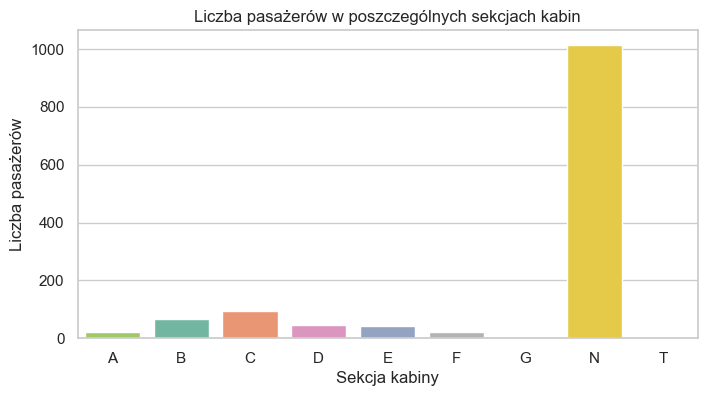

In [174]:
# Pobranie pierwszej litery numeru kabiny (oznacza sekcję na statku)
df_copy['cabin_section'] = df_copy['cabin'].astype(str).str[0]

# Tworzenie wykresu słupkowego z poprawionym przypisaniem kolorów
plt.figure(figsize=(8, 4))
sns.countplot(x='cabin_section', hue='cabin_section', data=df_copy, 
              order=sorted(df_copy['cabin_section'].unique()), 
              palette='Set2', legend=False)

# Dodanie tytułu i etykiet
plt.title('Liczba pasażerów w poszczególnych sekcjach kabin')
plt.xlabel('Sekcja kabiny')
plt.ylabel('Liczba pasażerów')

# Wyświetlenie wykresu
plt.show()

Kabiny oznaczone literami (np. A, B, C...) wskazują lokalizację na statku, a dokładniej litera oznacza pokład, na którym znajdowała się kabina.

A – Najwyższy pokład (Boat Deck), luksusowe apartamenty 1 klasy.

B, C – Kabiny 1 klasy, położone na wyższych pokładach.

D, E – Kabiny 1 i 2 klasy (D bardziej luksusowe, E mniej).

F – Kabiny głównie 2 klasy, chociaż część F mogła należeć do 3 klasy.

G- Dolny pokład, głównie 2 klasa, ale w pobliżu maszynowni mogły znajdować się kabiny dla pasażerów 3 klasy.

T – W danych Titanica pojawia się jedna kabina oznaczona "T", ale brak historycznych dowodów, że taka sekcja istniała. Najprawdopodobniej jest to błąd w dokumentacji lub omyłkowe przypisanie. Statek nie miał pokładu oznaczonego "T" – litery kończyły się na "G".

N - Pasażerowie 3 klasy często nie mieli przypisanych indywidualnych kabin, ale spali w większych pomieszczeniach wieloosobowych.

In [123]:
df_copy['cabin_section'] = df_copy['cabin'].astype(str).str[0]
print("Liczba pasażerów przypisanych do poszczególnych sekcji kabin (na podstawie pierwszej litery kodu kabiny):\n")
print(df_copy['cabin_section'].value_counts())

Liczba pasażerów przypisanych do poszczególnych sekcji kabin (na podstawie pierwszej litery kodu kabiny):

N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_section, dtype: int64


W niektórych przypadkach kilka osób mogło dzielić jedną kabinę (np. rodziny). Możemy zobaczyć, ile osób było przypisanych do tych samych kabin.

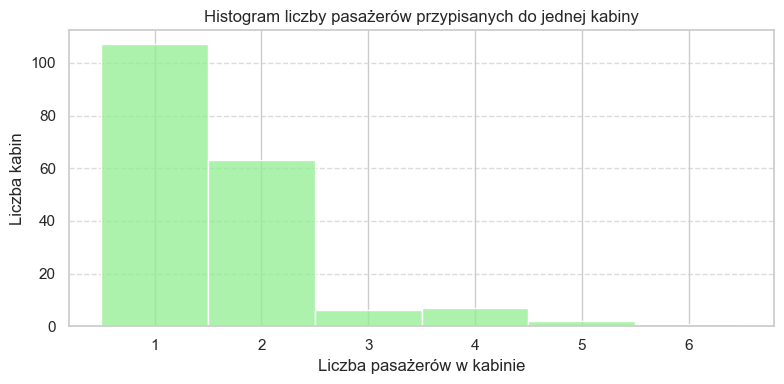

In [175]:
# Obliczenie liczby osób przypisanych do jednej kabiny (bez nieprzydzielonych)
cabin_counts = df_copy[df_copy['cabin'] != 'Nieprzydzielona']['cabin'].value_counts()

# Tworzenie histogramu
plt.figure(figsize=(8, 4))
max_people = cabin_counts.max()  # maksymalna liczba pasażerów w jednej kabinie
sns.histplot(cabin_counts, bins=range(1, max_people + 2), color='lightgreen', discrete=True)

plt.title('Histogram liczby pasażerów przypisanych do jednej kabiny')
plt.xlabel('Liczba pasażerów w kabinie')
plt.ylabel('Liczba kabin')
plt.xticks(range(1, max_people + 1))  # podziałka co 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Wartość 1 na histogramie dominuje, co wskazuje na to, że większość pasażerów miała przypisane pojedyncze kabiny. Może to dotyczyć głównie pasażerów 1 klasy, którzy mieli luksusowe kabiny.

Pasażerowie 2 i 3 klasy często dzielili kabiny z innymi osobami. Klasy były mniej kosztowne, a pasażerowie mogli dzielić przestrzeń z innymi.

### <span style="color:  #93bf99"> Cena biletu (fare)

In [125]:
df_copy['fare'].describe()


count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [126]:
fare_mean=df_copy['fare'].mean().round()
fare_min=df_copy['fare'].min()
fare_max=df_copy['fare'].max()

print(f"Średnia cena biletu wynosiła {fare_mean} funty")
print(f"Cena najtańszego biletu to {fare_min} funtów")
print(f"Najdroższy bilet kosztował {fare_max} funtów")

Średnia cena biletu wynosiła 33.0 funty
Cena najtańszego biletu to 0.0 funtów
Najdroższy bilet kosztował 512.3292 funtów


Cena minimalna wynosi 0 zł co wydaje się być niemożliwe, prawdopodobnie oznacza to, że część pasażerów podróżowała na specjalnych warunkach, np. jako załoga lub pasażerowie na zniżkach.

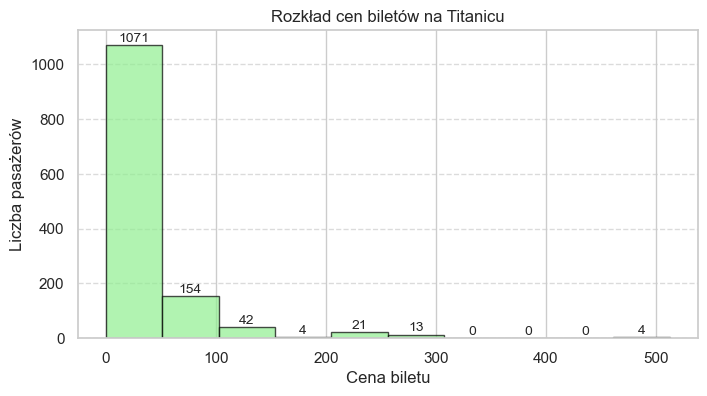

In [176]:
# Tworzenie histogramu
plt.figure(figsize=(8, 4))
counts, bins, patches = plt.hist(df_copy["fare"], bins=10, color='lightgreen', edgecolor="black", alpha=0.7)

# Dodawanie wartości nad słupkami, wycentrowanych względem przedziałów
for count, left_edge, right_edge in zip(counts, bins[:-1], bins[1:]):
    bin_center = (left_edge + right_edge) / 2  # Środek przedziału
    plt.text(bin_center, count + 1, str(int(count)), fontsize=10, ha="center", va="bottom")

plt.xlabel("Cena biletu")
plt.ylabel("Liczba pasażerów")
plt.title("Rozkład cen biletów na Titanicu")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Cena minimalna wynosi 0 zł co wydaje się być niemożliwe, prawdopodobnie oznacza to, że część pasażerów podróżowała na specjalnych warunkach, np. jako załoga lub pasażerowie na zniżkach.

Rozkład cen jest bardzo niesymetryczny.

Większość pasażerów kupowała bilety w niskim przedziale cenowym (blisko 0–50 funtów), co sugeruje, że większość osób podróżowała w 3 klasie.
Tylko czterech pasażerów zapłaciło bardzo wysokie ceny za bilety w luksusowych kabinach pierwszej klasy.

Bardzo niskie ceny (bliskie 0) mogą oznaczać, że część pasażerów podróżowała na specjalnych warunkach, np. jako załoga lub pasażerowie na zniżkach.


Średnia cena biletu jest zawyżona przez bardzo drogie bilety. Mediana wynosi ok 8 funtów, co zdecydowanie lepiej odzwierciedla typową cenę biletu.

In [128]:
df_copy.groupby("pclass")["fare"].mean().reset_index()

pclass       fare
0     1.0  87.508992
1     2.0  21.179196
2     3.0  13.304513

Ogromna różnica w cenach między klasami

Średnia cena biletu w 1 klasie (87.51) jest ponad 4 razy wyższa niż w 2 klasie (21.18) i ponad 6 razy wyższa niż w 3 klasie (13.30).

Potwierdza to wyraźne różnice w standardzie podróży między klasami.

Klasa pierwsza była luksusowa i dostępna dla najbogatszych, pasażerowie 1 klasy płacili za komfort, przestronne kabiny i lepszą obsługę.

Klasa druga jako opcja pośrednia - średnia cena 21.18 pokazuje, że klasa druga była znacznie tańsza niż pierwsza, ale nadal wyraźnie droższa od trzeciej. Możliwe, że podróżowali nią przedstawiciele klasy średniej – urzędnicy, przedsiębiorcy, lepiej sytuowani rzemieślnicy.

Klasa trzecia – podróż dla mniej zamożnych. Średnia cena 13.30 potwierdza, że 3 klasa była najtańszą opcją, dostępną dla robotników i imigrantów.

Pasażerowie podróżowali w gorszych warunkach, a bilety były znacznie bardziej przystępne cenowo.

Sprawdźmy jeszcze jak wyglada rozkład cen biletów w poszczególnych klasach

In [129]:
df_copy.groupby("pclass")["fare"].describe()

count       mean        std  min      25%      50%       75%       max
pclass                                                                        
1.0     323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2.0     277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3.0     709.0  13.304513  11.486319  0.0   7.7500   8.0500   15.2458   69.5500

**Pierwsza klasa:**

Średnia cena: 87.51, co wskazuje na stosunkowo wysoką cenę biletów.

Min. cena: 0.0, co może oznaczać darmowe bilety (np. dla załogi) lub specjalne zniżki.

Mediana: 60.00 – cena jest wyraźnie mniejsza niż średnia, co sugeruje, że niektórzy pasażerowie zapłacili bardzo wysokie ceny (np. luksusowe kabiny).

Max. cena: 512.33 – bardzo wysoka cena, co świadczy o istnieniu drogich biletów w 1 klasie, które były przeznaczone dla najbogatszych pasażerów.

**Druga klasa:**

Średnia cena: 21.18, co wskazuje na średni poziom cen, typowy dla klasy średniej.

Min. cena: 0.0, podobnie jak w 1 klasie, możliwe, że niektórzy pasażerowie otrzymali bilety za darmo.

Mediana: 15.05 – średnia cena w tej klasie jest wyższa niż mediana, co wskazuje, że większość pasażerów płaciła ceny nieco poniżej średniej, ale niektóre bilety były droższe.

Max. cena: 73.50 – w tej klasie również występują biletów o wyższych cenach, ale nadal znacznie tańszych niż w 1 klasie.

**Trzecia klasa:**

Średnia cena: 13.30 – cena typowa dla najtańszych biletów, dostępnych dla imigrantów i osób o niższym statusie społecznym.

Min. cena: 0.0 – podobnie jak w innych klasach, być może z powodu biletów za darmo lub symbolicznych opłat.

Mediana: 8.05 – niższa niż średnia, co sugeruje, że duża część pasażerów zapłaciła minimalną cenę za bilet.

Max. cena: 69.55 – najwyższe ceny w 3. klasie są nadal niższe niż te w 2 i 1 klasie, ale wyraźnie wyższe niż większość biletów.

**Wnioski:**

Różnice w cenach między klasami są wyraźne, z największą koncentracją tanich biletów w 3 klasie.

Wysokie ceny biletów w 1. klasie wynikają z luksusowych kabin, a w 2 klasie widać opcje średniej jakości.

Ceny w 3 klasie są głównie niskie, co czyni ją dostępną dla osób mniej zamożnych.

### <span style="color:  #93bf99"> Port, w którym pasażer wszedł na pokład (embarked)

In [130]:
df['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)


**S** = Southampton (Wielka Brytania)

**C** = Cherbourg (Francja)

**Q** = Queenstown (Irlandia)


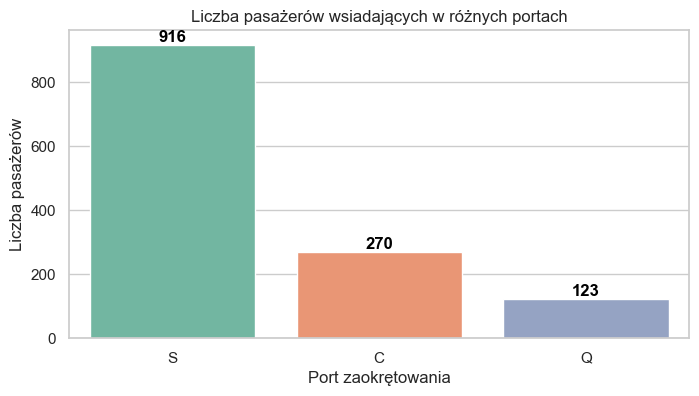

In [177]:
# Tworzenie wykresu słupkowego z liczbami nad słupkami
plt.figure(figsize=(8, 4))
ax = sns.countplot(x="embarked", hue="embarked", data=df_copy, palette="Set2", legend=False)

# Dodanie wartości nad słupkami
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Opisy osi i tytuł
plt.xlabel("Port zaokrętowania")
plt.ylabel("Liczba pasażerów")
plt.title("Liczba pasażerów wsiadających w różnych portach")

# Wyświetlenie wykresu
plt.show()

Najwięcej pasażerów wsiadło na pokład w porcie Southampton (S).

Znacznie mniej osób zaokrętowało w Cherbourg (C) i Queenstown (Q).

Port zaokrętowania może mieć wpływ na klasę podróży i prawdopodobieństwo przeżycia, co warto zbadać w dalszej analizie.

### <span style="color:  #93bf99"> Miejsce docelowe (home.dest)

Określa miejsce docelowe pasażera (np. "New York, NY", "Montreal, Canada").

Pasażerowie podróżowali do wielu różnych miejsc, jednak niektóre destynacje były znacznie popularniejsze. Aby zwiekszyć czytelność danych zawęzimy analizę do 10 najczęściej wybieranych miejsc docelowych.

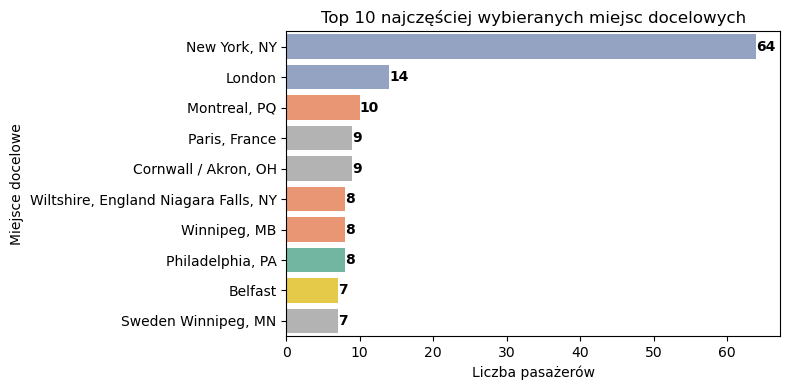

In [132]:
# Filtrowanie danych – usunięcie "Nieznany" z kolumny "home.dest"
df_dest = df_copy[df_copy["home.dest"] != "Nieznany"]

# Wybranie 10 najczęściej występujących miejsc docelowych (bez "Nieznany")
top_10_destinations = df_dest["home.dest"].value_counts().head(10).index

plt.figure(figsize=(8, 4))
ax = sns.countplot(y="home.dest", hue="home.dest", data=df_dest, palette="Set2", 
                   order=top_10_destinations, legend=False)

# Dodanie wartości liczbowych na paskach
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=10, fontweight='bold', color='black')

plt.xlabel("Liczba pasażerów")
plt.ylabel("Miejsce docelowe")
plt.title("Top 10 najczęściej wybieranych miejsc docelowych")
plt.tight_layout()
plt.show()

Po zmianie zakresu okazało się, że do najczęściej wybieranych 10 miejsc docelowych zmierzała stosunkowo niewielka liczba pasażerów w porównaniu do całkowitej liczby podróżnych. Oznacza to, że trasa Titanica była wyjątkowo różnorodna biorąc pod uwagę destynację, a wielu pasażerów miało unikalne lub rzadko powtarzające się cele podróży.

In [133]:
# Liczba unikalnych miejsc docelowych
num_unique_destinations = df_copy["home.dest"].nunique()
print(f"Liczba wszystkich unikalnych miejscowości docelowych: {num_unique_destinations}")

Liczba wszystkich unikalnych miejscowości docelowych: 370


To może sugerować, że Titanic służył nie tylko jako środek transportu do kilku głównych miast, ale również jako łącznik pomiędzy wieloma mniej popularnymi lokalizacjami, do których pasażerowie musieli później kontynuować podróż innymi środkami transportu.

### <span style="color:  #93bf99"> Numer łodzi ratunkowej (boat)

In [134]:
df['boat'].unique()

array(['2', '11', nan, '3', '10', 'D', '4', '9', '6', 'B', '8', 'A', '5',
       '7', 'C', '14', '5 9', '13', '1', '15', '5 7', '8 10', '12', '16',
       '13 15 B', 'C D', '15 16', '13 15'], dtype=object)

Jeśli pasażer przeżył i został ewakuowany, jego numer łodzi jest podany.

### <span style="color:  #93bf99"> Numer biletu (ticket)

W zbiorze danych Titanica kolumna ticket zawiera numery biletów pasażerów, np.:

A/5 21171, PC 17599, 113803, STON/O 2. 3101282.


Niektóre bilety miały przedrostki, które mogą wskazywać na:

-- Rodzaj biletu (np. bilet agencyjny, bilet załogi, bilet łączony dla grupy pasażerów).

-- Linię żeglugową lub miejsce zakupu.


<u>Przykłady:</u>


PC	Bilet sprzedany przez The Pennsylvania Railroad Company (droższe bilety, głównie 1. klasa).

A/5	Bilet dla emigrantów, głównie 3. klasa.

STON/O	„Southampton Office” – bilety kupione w Southampton, często przez emigrantów.

CA	Bilet kupiony przez Atlantic Transport Line – klasa 2. i 3.

S.O.C.	Bilety wydane przez The White Star Line.

F.C.C.	"First Class Cabin" – bilety ekskluzywne, pierwsza klasa.
 
**Czy numer biletu miał wpływ na przeżycie?**

Ponieważ dostępne dane nie zawierają pełnej informacji na temat struktury numerów biletów oraz ich znaczenia, na potrzeby analizy pominiemy tę zmienną. Zamiast tego skupimy się na miejscu zakwaterowania pasażerów, które może dostarczyć bardziej istotnych informacji na temat ich warunków podróży i potencjalnego wpływu na szanse przeżycia.

# <span style="color: #93bf85"> EDA5  - analiza relacji między zmiennymi

Analiza wzajemnych relacji w zbiorze danych ma na celu zrozumienie, w jaki sposób różne cechy pasażerów, takie jak wiek, płeć, klasa pasażerska czy liczba członków rodziny, wpływają na szanse przeżycia. Poprzez badanie korelacji między tymi zmiennymi, będziemy w stanie zidentyfikować czynniki, które miały największy wpływ na przeżycie, a także odkryć potencjalne zależności pomiędzy cechami, które mogą pomóc w dalszym modelowaniu. Przeanalizujmy zatem zależności między cechami a wartością survived.

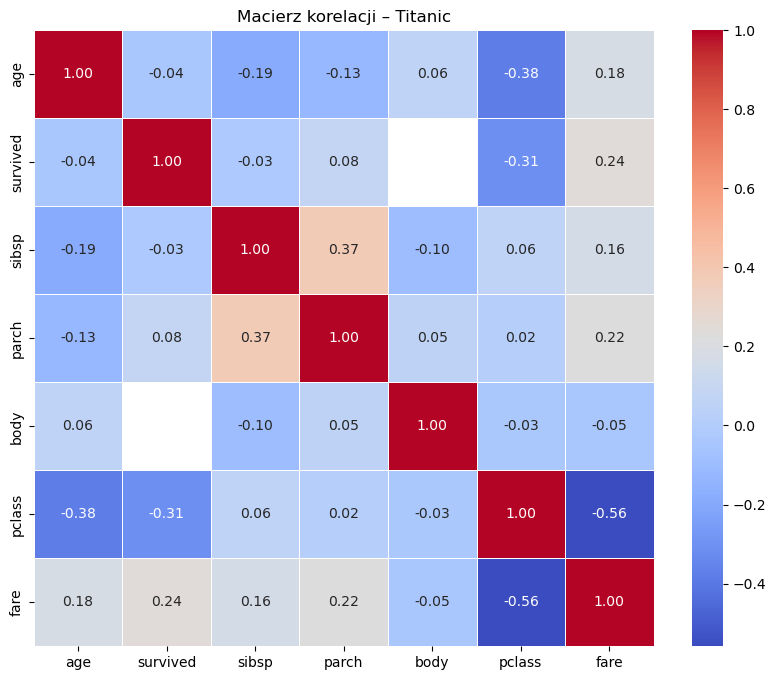

In [135]:
# Krok 1 – wybieramy tylko kolumny numeryczne z df_copy
numeric_df = df_copy.select_dtypes(include=['int64', 'float64'])

# Krok 2 – tworzymy macierz korelacji
correlation_matrix = numeric_df.corr(numeric_only=True)

# Krok 3 – rysujemy heatmapę
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Macierz korelacji – Titanic')
plt.show()

Najsilniejsze ujemne korelacje:

- zmienna klasa biletu koreluje z wiekiem, przeżyciem i ceną biletu,

- sibsp i parch (rodzina na pokładzie) mają dodatnią korelację ze sobą – osoby z rodzeństwem częściej miały też rodziców/dzieci na pokładzie.

Przeanalizujmy zatem zależności między poszczególnymi kategoriami a wartością survived.

### <span style="color:  #93bf99"> Płeć (sex)

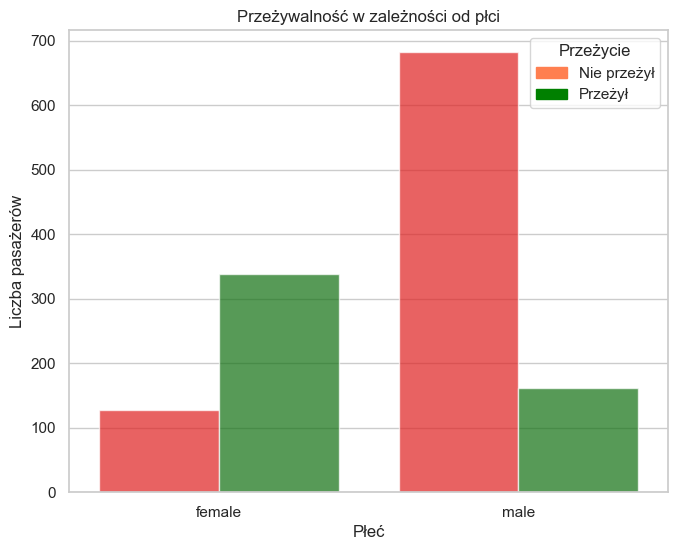

In [188]:
# Wykres przeżywalności wg płci
plt.figure(figsize=(17, 6))

# Kolory - 0 (Nie przeżył) = czerwony, 1 (Przeżył) = zielony
palette = {0: 'red', 1: 'green'}

plt.subplot(1, 2, 1)
sns.countplot(data=df_copy, x='sex', hue='survived', palette=palette, alpha=0.7)
plt.title('Przeżywalność w zależności od płci')
plt.xlabel('Płeć')
plt.ylabel('Liczba pasażerów')

# Tworzenie legendy
from matplotlib.patches import Patch
legend_labels = [Patch(color='coral', label='Nie przeżył'), Patch(color='green', label='Przeżył')]
plt.legend(handles=legend_labels, title='Przeżycie', loc='upper right');


Na wykresie widać wyraźnie, że kobiety miały znacznie wyższe szanse na przeżycie niż mężczyźni. W przypadku kobiet przeważająca liczba pasażerek przeżyła, podczas gdy wśród mężczyzn odsetek tych, którzy nie przeżyli, jest znacznie wyższy.

Skad takie proporcje? 

Wśród mężczyzn zaledwie niewielka część przeżyła katastrofę, co wskazuje na bardziej ograniczony dostęp do łodzi ratunkowych.

W przypadku kobiet odsetek przeżycia jest wyraźnie wyższy, co może wynikać z priorytetowego traktowania kobiet i dzieci w procesie ewakuacji.


Sprawdźmy jak to wyglądało procentowo:

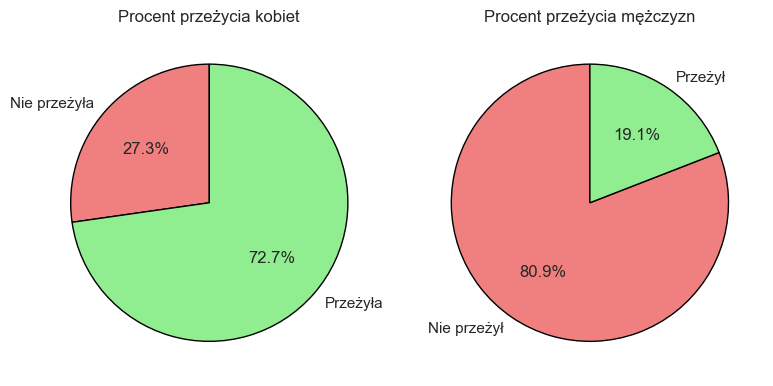

In [189]:
# Obliczanie procentu przeżycia dla mężczyzn i kobiet
survival_by_sex = df_copy.groupby('sex')['survived'].value_counts(normalize=True).unstack() * 100

# Tworzenie wykresów kołowych
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Wykres dla kobiet
axes[0].pie(survival_by_sex.loc['female'], 
            labels=['Nie przeżyła', 'Przeżyła'], 
            autopct='%1.1f%%', startangle=90, 
            colors=['lightcoral', 'lightgreen'], 
            wedgeprops={'edgecolor': 'black'})

axes[0].set_title('Procent przeżycia kobiet')

# Wykres dla mężczyzn
axes[1].pie(survival_by_sex.loc['male'], 
            labels=['Nie przeżył', 'Przeżył'], 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=['lightcoral', 'lightgreen'], 
            wedgeprops={'edgecolor': 'black'})

axes[1].set_title('Procent przeżycia mężczyzn')

plt.tight_layout()
plt.show()

**Podsumowanie:**

Płeć miała istotny wpływ na szanse przeżycia – kobiety miały zdecydowanie wyższy wskaźnik przeżywalności niż mężczyźni.

### <span style="color:  #93bf99"> Wiek (age)

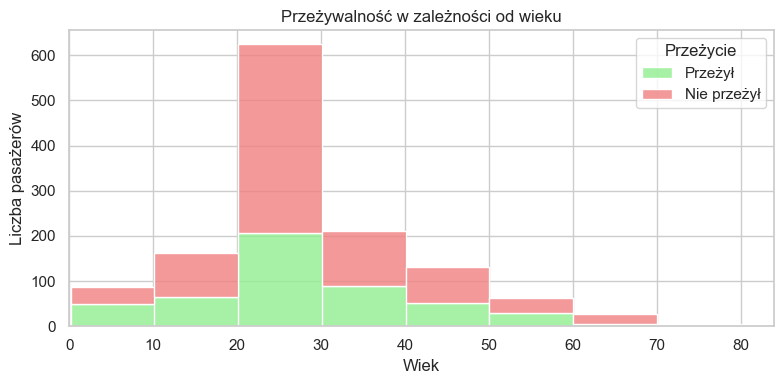

In [216]:
# Wykres przeżywalności wg wieku z poprawnym przypisaniem kolorów do legendy

plt.figure(figsize=(8, 4))

# Tworzymy wykres z hue='survived', ale ręcznie przypisujemy kolory
sns.histplot(data=df_copy, x='age', hue='survived', multiple='stack', 
             palette={0: 'lightcoral', 1: 'lightgreen'}, alpha=0.8, bins=8)

plt.title('Przeżywalność w zależności od wieku')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')

# Ustawienie minimalnej wartości osi X na 0
plt.xlim(left=0)

# Dodanie legendy z odpowiednimi etykietami
plt.legend(title='Przeżycie', labels=['Przeżył', 'Nie przeżył'], loc='upper right')

# Wyświetlenie wykresów
plt.tight_layout()
plt.show()

Widać, że młodsze osoby (szczególnie dzieci) miały wyraźnie wyższy wskaźnik przeżycia. Możliwe, że dzieci miały priorytet w ewakuacji, co zwiększało ich szanse na przeżycie.

W przedziale wiekowym 20-40 lat widzimy większą liczbę osób, które nie przeżyły w porównaniu do tych, które przeżyły. Zdecydowana większość osób w tej grupie wiekowej zginęła.

Starsze osoby (powyżej 50 roku życia) miały podobny wskaźnik przeżycia do osób w średnim wieku, ale były mniej liczne w porównaniu do młodszych pasażerów. Widać jednak, że ich szanse na przeżycie były również mniejsze, podobnie jak u dorosłych w średnim wieku. Osoby powyżej 60 roku życia na Titanicu miały znacznie mniejsze szanse na przeżycie w porównaniu do młodszych pasażerów.

**Podsumowanie:**

Możliwe, że priorytet ewakuacyjny dotyczył przede wszystkim dzieci i młodszych pasażerów, co wpłynęło na wyniki przeżywalności w zależności od wieku.

### <span style="color:  #93bf99"> Tytuł (title)

Aby lepiej zrozumieć wpływ pozycji społecznej i stanu cywilnego na przeżywalność pasażerów Titanica, porównamy odsetki przeżycia wśród osób należących do grupy "Elita", a także między kobietami zamężnymi i niezamężnymi. Taka analiza pozwala dostrzec, czy uprzywilejowane grupy miały realnie wyższe szanse na przetrwanie katastrofy.

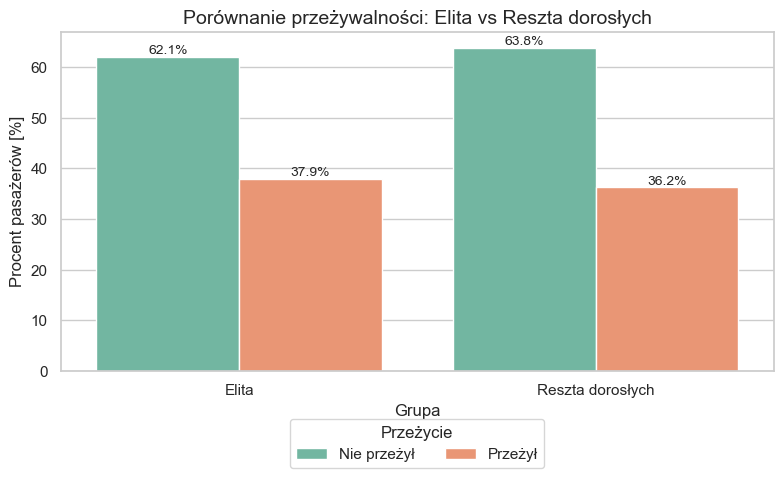

In [194]:
# Styl wykresów
sns.set(style="whitegrid")

# Stworzenie grupy Elita i reszta dorosłych
df_copy['is_adult'] = df_copy['age'] >= 18  # Przyjmujemy, że dorosły to osoba powyżej 18 roku życia
df_copy['group'] = df_copy['title'].apply(lambda x: 'Elita' if x == 'Elita' else 'Reszta dorosłych')

# Filtrujemy tylko dorosłych pasażerów
adult_df = df_copy[df_copy['is_adult']]

# Obliczenie przeżywalności dla obu grup
survival_data = adult_df.groupby(['group', 'survived']).size().unstack(fill_value=0)
survival_data = survival_data.div(survival_data.sum(axis=1), axis=0) * 100  # Procenty

# Tworzenie wykresu
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=survival_data.reset_index().melt(id_vars='group', value_name='Percentage'),
    x='group',
    y='Percentage',
    hue='survived',
    palette='Set2'
)

# Dodawanie etykiet procentowych nad słupkami
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

# Ustawienie legendy 
handles, labels = ax.get_legend_handles_labels()
labels = ['Nie przeżył', 'Przeżył']  # Zamiana etykiet
ax.legend(handles, labels, title='Przeżycie', loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2)

# Ustawienia wykresu
plt.title('Porównanie przeżywalności: Elita vs Reszta dorosłych', fontsize=14)
plt.xlabel('Grupa', fontsize=12)
plt.ylabel('Procent pasażerów [%]', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Dopasowanie wykresu
plt.tight_layout()
plt.show()

**Wnioski:**

Osoby z tytułem "Elita" (arystokracja, wojskowi, duchowieństwo) miały wyższy procent przeżywalności niż reszta dorosłych pasażerów.

Może to sugerować, że wyższy status społeczny dawał lepszy dostęp do szalup ratunkowych oraz pierwszeństwo w ewakuacji.

Może to również wskazywać na preferencyjne traktowanie pasażerów z wyższym statusem społecznym w krytycznych sytuacjach.

Reszta dorosłych pasażerów (w tym osoby z niższymi tytułami lub bez tytułu) miała niższy procent przeżycia. To może być wynikiem mniejszego priorytetu w ewakuacji, jak również różnic w zdrowiu fizycznym (wielu pasażerów mogło być starszych, chorych lub słabszych fizycznie).

Trzeba jednak podkreślić, że różnice są minimalne.

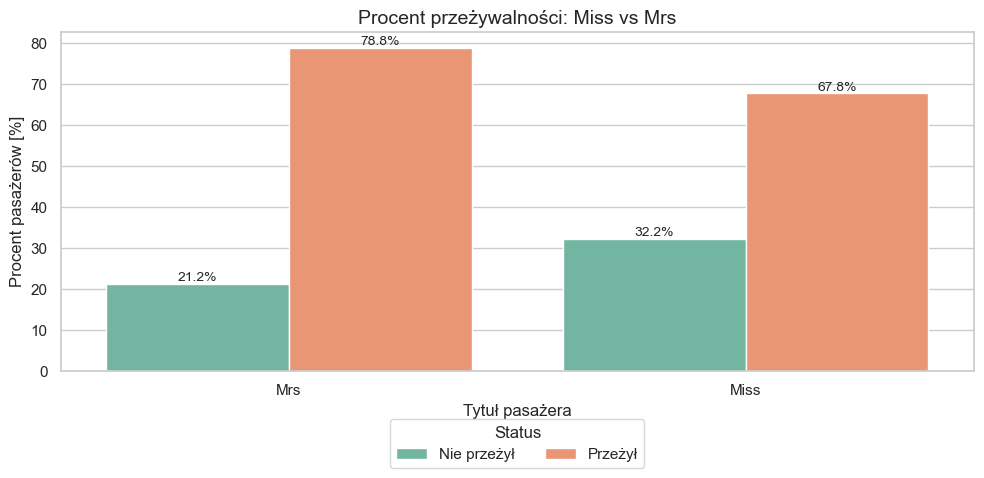

In [140]:
sns.set(style="whitegrid")

# Funkcja zwracająca dane procentowe, z pełnym zakresem klas (0 i 1)
def survival_percentages(df_copy, title):
    subset = df_copy[df_copy['title'] == title]['survived'].value_counts(normalize=True)
    subset = subset.reindex([0, 1], fill_value=0)  # zapewnia obecność obu klas
    result = subset.reset_index()
    result.columns = ['survived', 'Percentage']
    result['Tytuł'] = title
    result['Status'] = result['survived'].map({0: 'Nie przeżył', 1: 'Przeżył'})
    result['Percentage'] = (result['Percentage'] * 100).round(1)
    return result

# Tworzenie danych dla wybranych tytułów z df_copy
mrs_data = survival_percentages(df_copy, 'Mrs')
miss_data = survival_percentages(df_copy, 'Miss')

# Połączenie danych do jednego DataFrame
plot_data = pd.concat([mrs_data, miss_data], ignore_index=True)

# Tworzenie wykresu
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=plot_data,
    x='Tytuł',
    y='Percentage',
    hue='Status',
    palette='Set2'
)

# Dodawanie etykiet tylko dla niezerowych słupków
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

# Ustawienia wykresu
plt.title('Procent przeżywalności: Miss vs Mrs', fontsize=14)
plt.xlabel('Tytuł pasażera', fontsize=12)
plt.ylabel('Procent pasażerów [%]', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Legenda pod wykresem
plt.legend(title='Status', loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2)
plt.tight_layout()
plt.show()

**Wnioski:**

Kobiety zamężne ("Mrs") miały wyższy procent przeżycia w porównaniu do kobiet niezamężnych ("Miss").

Kobiety zamężne mogły mieć lepszy dostęp do szalup ratunkowych dzięki wyższemu statusowi społecznemu (być może były to osoby z klasy średniej lub wyższej). Być może na pierwszeństwo miał wpływ wiek - kobiety zamęże mogły być starsze lub posiadanie dzieci.. Kobiety niezamężne mogły być w większości młodsze mieć większą szansę fizyczną na przeżycie, dlatego nie zawsze były traktowane priorytetowo w ewakuacji.

### <span style="color:  #93bf99"> Klasa biletu (pclass)

Klasa podróży odzwierciedlała status ekonomiczny pasażerów, co mogło mieć wpływ na dostęp do szalup ratunkowych i pierwszeństwo ewakuacji. Sprawdźmy, jak wyglądała przeżywalność w zależności od klasy: 1 (najwyższa), 2 i 3 (najniższa).

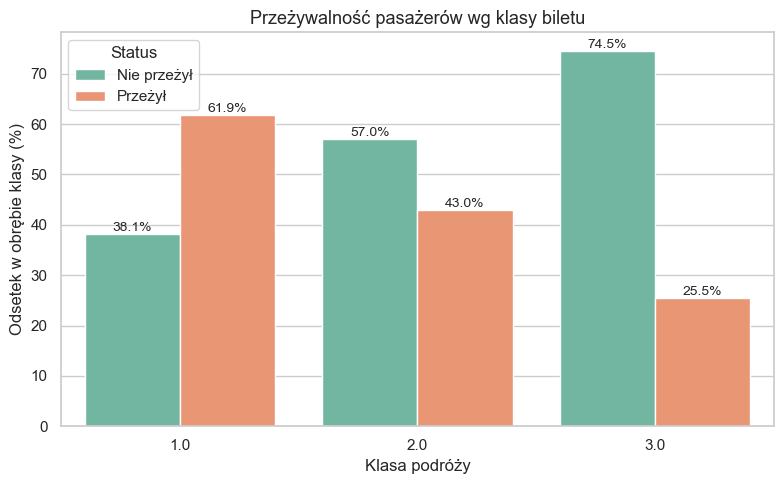

In [205]:
# Tworzymy kopię z nazwanym statusem
df_class = df_copy[['pclass', 'survived']].copy()
df_class['status'] = df_class['survived'].map({0: 'Nie przeżył', 1: 'Przeżył'})

# Obliczamy liczbę i procent pasażerów w każdej klasie i statusie
class_counts = df_class.groupby(['pclass', 'status']).size().reset_index(name='count')
total_per_class = class_counts.groupby('pclass')['count'].transform('sum')
class_counts['percent'] = (class_counts['count'] / total_per_class * 100).round(1)

# Rysowanie wykresu
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=class_counts,
    x='pclass',
    y='percent',
    hue='status',
    palette='Set2'
)

# Dodanie wartości procentowych nad słupkami
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

# Ustawienia wykresu
ax.set_title('Przeżywalność pasażerów wg klasy biletu', fontsize=13)
ax.set_ylabel('Odsetek w obrębie klasy (%)')
ax.set_xlabel('Klasa podróży')
ax.legend(title='Status')

plt.tight_layout()
plt.show()



**Wnioski**

Pasażerowie 1 klasy mieli najwyższy odsetek przeżycia – mogli korzystać z pierwszeństwa ewakuacji oraz mieli lepszy dostęp do szalup ratunkowych.

Pasażerowie 2 klasy mieli umiarkowaną przeżywalność, ale wyraźnie niższą niż 1 klasa.

Pasażerowie 3 klasy mieli najniższą szansę na przeżycie, co może wynikać z ich lokalizacji na statku (niższe pokłady), ograniczonego dostępu do wyjść ewakuacyjnych i niższego priorytetu w ewakuacji.

### <span style="color:  #93bf99"> Liczba rodzeństwa/małżonków na pokładzie,  Liczba rodziców/dzieci na pokładzie (sibsp/parch)

Kolejnym z czynników, który mógł wpływać na szanse przeżycia pasażerów Titanica, była obecność członków rodziny na pokładzie. Sprawdzamy, czy osoby podróżujące z rodziną miały wyższy wskaźnik przeżywalności niż pasażerowie podróżujący samotnie.

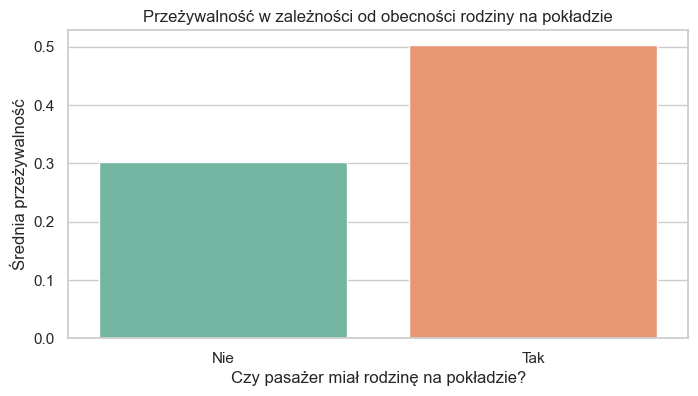

In [203]:
# sumuję dane z dwóch kolumn
#Teraz has_family to:
#True – jeśli ktoś podróżował z rodziną
#False – jeśli podróżował samotnie
df_copy['has_family'] = (df_copy['sibsp'] + df_copy['parch']) > 0

sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

sns.barplot(
    x='has_family',
    y='survived',
    data=df_copy,
    errorbar=None,         
    hue='has_family',      
    palette='Set2',
    legend=False           # nie chcemy dodatkowej legendy
)

plt.title('Przeżywalność w zależności od obecności rodziny na pokładzie')
plt.xlabel('Czy pasażer miał rodzinę na pokładzie?')
plt.ylabel('Średnia przeżywalność')
plt.xticks([0, 1], ['Nie', 'Tak'])

plt.show()

Osoby z rodziną mają średnią przeżywalność ok. 0.5 (50%)

Osoby bez rodziny mają średnią przeżywalność ok 0.3 (30%)

**Wniosek:**

Pasażerowie z rodziną mieli większe szanse na przeżycie.
Obecność bliskich mogła wpływać na zachowanie w sytuacji kryzysowej – np. pomagali sobie nawzajem, szybciej podejmowali decyzje, nie byli pozostawieni sami sobie. 

Aby dokładniej zrozumieć wpływ obecności rodziny na szanse przeżycia pasażerów Titanica, przeanalizujemy trzy dodatkowe zależności:

1. Jak liczba członków rodziny na pokładzie (czyli suma zmiennych sibsp i parch) wpływała na przeżywalność.
2. Czy efekt obecności rodziny był taki sam dla kobiet i mężczyzn?
3. Czy relacja między podróżowaniem z rodziną a przeżyciem różniła się w zależności od klasy podróży.

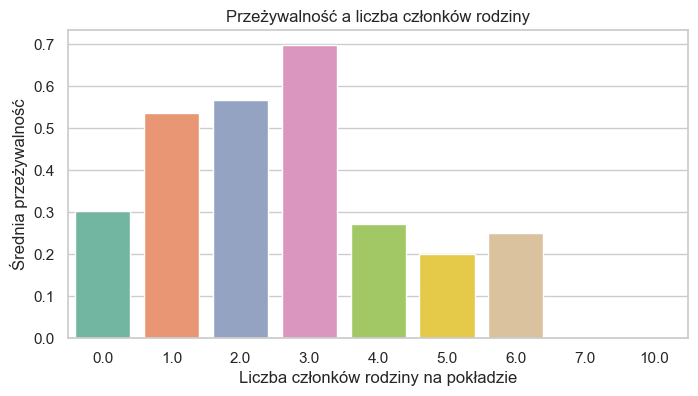

In [202]:
df_copy['family_size'] = df_copy['sibsp'] + df_copy['parch']

plt.figure(figsize=(8, 4))
sns.barplot(
    x='family_size',
    y='survived',
    hue='family_size', 
    data=df_copy,
    errorbar=None,
    palette='Set2',
    legend=False                 # <– usuwamy legendę, bo hue == x
)
plt.title('Przeżywalność a liczba członków rodziny')
plt.xlabel('Liczba członków rodziny na pokładzie')
plt.ylabel('Średnia przeżywalność')
plt.show()

Najwyższa przeżywalność była przy 1–3 członkach rodziny.

Osoby całkowicie samotne (0) i te z bardzo dużą rodziną (5–8) miały niższe szanse.

**Wnioski:**

Zbyt mała lub zbyt duża liczba członków rodziny może zmniejszać szanse przeżycia. Pasażerowie z umiarkowaną liczbą bliskich (1–3) mogli sobie wzajemnie pomagać w bardziej zorganizowany sposób.

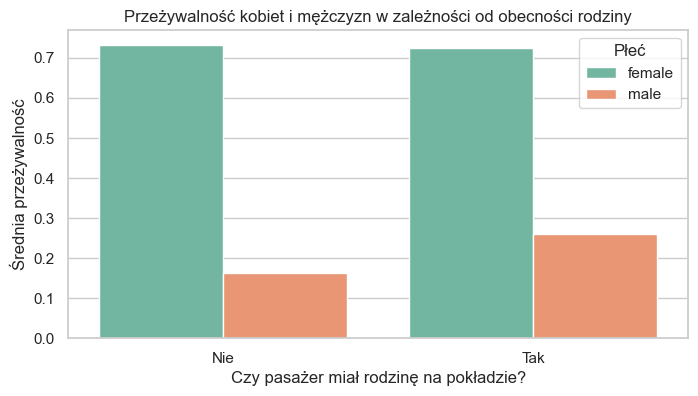

In [201]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x='has_family',
    y='survived',
    hue='sex',
    data=df_copy,
    errorbar=None,
    palette='Set2'
)
plt.title('Przeżywalność kobiet i mężczyzn w zależności od obecności rodziny')
plt.xlabel('Czy pasażer miał rodzinę na pokładzie?')
plt.ylabel('Średnia przeżywalność')
plt.xticks([0, 1], ['Nie', 'Tak'])
plt.legend(title='Płeć')
plt.show()

**Wnioski:**

Kobiety mają wysoką przeżywalność niezależnie od obecności rodziny (efekt "kobiety i dzieci najpierw").

Mężczyźni bez rodziny mają najniższą przeżywalność – być może byli zostawieni "na końcu kolejki".

Obecność rodziny miała większy wpływ na szanse przeżycia mężczyzn niż kobiet.

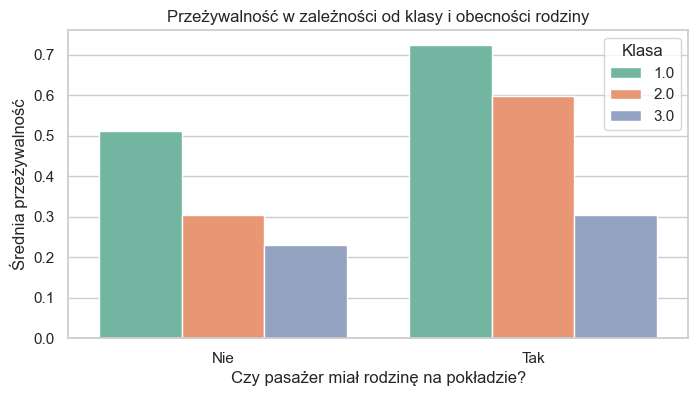

In [200]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x='has_family',
    y='survived',
    hue='pclass',
    data=df_copy,
    errorbar=None,
    palette='Set2'
)
plt.title('Przeżywalność w zależności od klasy i obecności rodziny')
plt.xlabel('Czy pasażer miał rodzinę na pokładzie?')
plt.ylabel('Średnia przeżywalność')
plt.xticks([0, 1], ['Nie', 'Tak'])
plt.legend(title='Klasa')
plt.show()

**Wnioski:**
  
W 1 klasie osoby z rodziną przeżywały najczęściej.

W 3 klasie nawet osoby z rodziną miały niską przeżywalność – trudniejsze warunki ewakuacji?

W 2 klasie różnice umiarkowane.

Obecność rodziny pomagała najbardziej w wyższych klasach, gdzie dostęp do szalup był lepszy.

### <span style="color:  #93bf99"> Numer kabiny (cabin)

Kabiny na Titanicu oznaczane były literami, które odzwierciedlały położenie na statku — znajdowały się one bliżej górnych pokładów. Sprawdzimy, czy posiadanie takiej kabiny wiązało się z wyższym współczynnikiem przeżycia, oraz czy osoby bez przypisanej kabiny ginęły częściej.

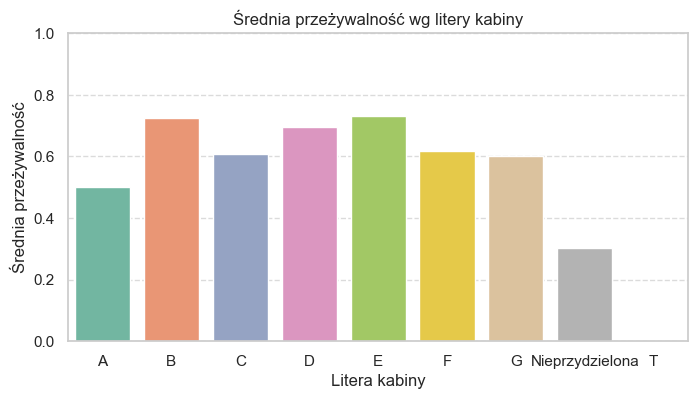

In [199]:
df_cabin = df_copy.copy()

# Wydzielamy pierwszą literę lub oznaczamy jako 'Nieprzydzielona'
df_cabin['cabin_letter'] = df_cabin['cabin'].apply(
    lambda x: x[0] if x != 'Nieprzydzielona' else 'Nieprzydzielona'
)

# Grupujemy i liczymy średnią przeżywalność
survival_by_cabin = df_cabin.groupby('cabin_letter', as_index=False)['survived'].mean()

# Wykres
plt.figure(figsize=(8,4))
sns.barplot(
    data=survival_by_cabin,
    x='cabin_letter',
    y='survived',
    hue='cabin_letter',
    palette='Set2',
    dodge=False,
    legend=False
)

plt.title('Średnia przeżywalność wg litery kabiny')
plt.xlabel('Litera kabiny')
plt.ylabel('Średnia przeżywalność')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Pasażerowie z kabinami oznaczonymi literami mieli różne wskaźniki przeżycia — przeżywalność pasażerów z kabiny oznaczonej literą B i E była najwyższ (ok. 75%), z kabiny A jednak nieco niższa ok. 50 %), co pokazuje, że nie wszystkie górne pokłady były równe pod względem szans na ratunek.

Najniższy współczynnik przeżycia mają osoby z kolumny Nieprzydzielona, czyli bez przypisanej kabiny – podróżni z najniższej klasy, bez dostępu do kajut lub ratunkowych pokładów.

### <span style="color:  #93bf99"> Cena biletu (fare)

Cena biletu mogła odzwierciedlać status społeczny oraz klasę podróży pasażera, co mogło wpływać na jego szanse przeżycia. Sprawdzimy czy potwierdzi się hipoteza, że wyższa cena biletu wiązała się z większym prawdopodobieństwem przeżycia katastrofy Titanica.

Najpierw jednak potwierdzimy hipotezę, że cena biletu była zależna od liczby osób na tym samym bilecie
Część pasażerów kupowała grupowe bilety (np. rodziny, przyjaciele), co mogło obniżyć koszt biletu na osobę.

Liczba pasażerów wynosiła 1309, liczba wartości unikatowych w kolumnie ticket to 929, co wskazuje na sporą liczbę biletów grupowych. 

In [147]:
df_copy['ticket'].value_counts()

CA. 2343    11
1601         8
CA 2144      8
PC 17608     7
347077       7
            ..
373450       1
2223         1
350046       1
3101281      1
315082       1
Name: ticket, Length: 929, dtype: int64

In [148]:
# Obliczamy ile osób miało ten sam bilet
ticket_group_size = df_copy['ticket'].value_counts()
df_copy['group_size'] = df_copy['ticket'].map(ticket_group_size)

# Cena biletu podzielona przez grupę – cena za osobę
df_copy['fare_per_person'] = (df_copy['fare'] / df_copy['group_size']).round(2)

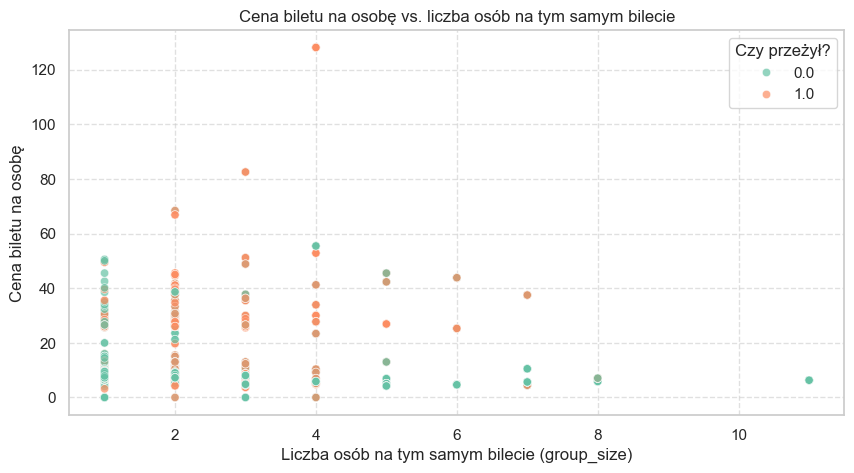

In [149]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_copy, x='group_size', y='fare_per_person', hue='survived', palette='Set2', alpha=0.7)

plt.title('Cena biletu na osobę vs. liczba osób na tym samym bilecie')
plt.xlabel('Liczba osób na tym samym bilecie (group_size)')
plt.ylabel('Cena biletu na osobę')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Czy przeżył?', loc='upper right')
plt.show()

Osoby z tanim biletem grupowym miały niższą przeżywalność — być może ze względu na miejsce w niższych pokładach lub trudniejszy dostęp do pokładów ratunkowych. Widać to zwłaszcza na biletach poniżej 20 funtów oraz grupach powyzej 4 osób. 

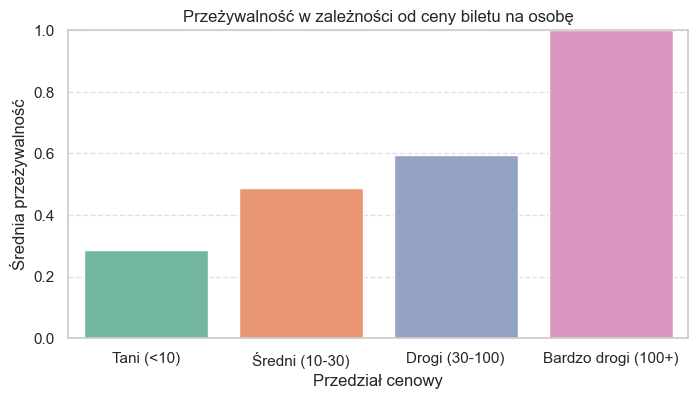

In [198]:
# Tworzymy kategorie cenowe
df_copy['fare_bin'] = pd.cut(df_copy['fare_per_person'], bins=[0, 10, 30, 100, 600], 
                              labels=['Tani (<10)', 'Średni (10-30)', 'Drogi (30-100)', 'Bardzo drogi (100+)'])

# Średnia przeżywalność w przedziałach cen
fare_survival = df_copy.groupby('fare_bin')['survived'].mean().reset_index()

# Wykres
plt.figure(figsize=(8,4))
sns.barplot(data=fare_survival, x='fare_bin', y='survived', hue='fare_bin', palette='Set2', legend=False)

plt.title('Przeżywalność w zależności od ceny biletu na osobę')
plt.xlabel('Przedział cenowy')
plt.ylabel('Średnia przeżywalność')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Pasażerowie z najtańszych biletów (<10) mieli najniższą przeżywalność – to byli zapewne pasażerowie 3 klasy, podróżujący w grupach (rodziny, emigranci), z ograniczonym dostępem do pokładów ratunkowych.

W miarę wzrostu ceny biletu (10–30, 30–100), przeżywalność wyraźnie rośnie – co wskazuje, że osoby z wyższych klas miały większe szanse na przeżycie.

Najdroższe bilety (>100) wiążą się z najwyższą przeżywalnością, ale należy pamiętać, że w tej grupie było stosunkowo mało osób – więc średnia przeżywalność może nie oddawać ogólnej tendencji i być bardziej przypadkowa.

**Wnioski:**

Droższe bilety (na osobę) zwiększały szansę na przeżycie – co może sugerować, że pasażerowie z wyższych klas mieli lepszy dostęp do szalup ratunkowych.

Cena biletu na osobę maleje, gdy więcej osób korzysta z tego samego biletu – sugeruje to bilety grupowe (rodziny, przyjaciele), które były tańsze w przeliczeniu na jedną osobę. Osoby z tanim biletem grupowym miały niższą przeżywalność — być może ze względu na miejsce w niższych pokładach lub trudniejszy dostęp do pokładów ratunkowych.

### <span style="color:  #93bf99"> Port, w którym pasażer wszedł na pokład (embarked)

Port zaokrętowania wskazuje miejsce, z którego pasażer wsiadł na pokład Titanica. Trzy główne porty to: Cherbourg (C), Queenstown (Q) i Southampton (S). Możemy sprawdzić, czy port miał związek z szansą na przeżycie, oraz czy był powiązany z klasą biletu.

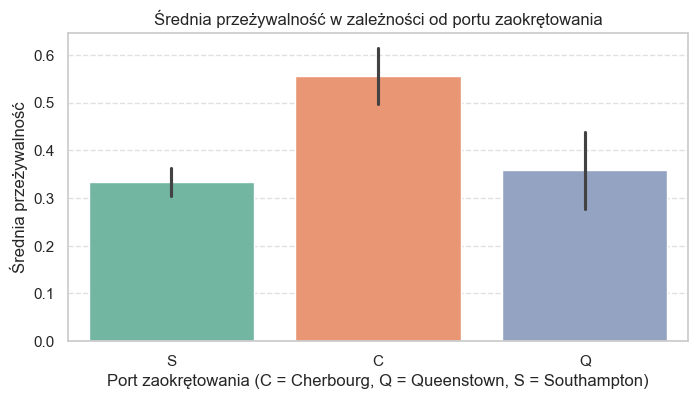

In [197]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_copy, x='embarked', y='survived', hue='embarked', palette='Set2', legend=False) #errorbar=None - usunie przedziały ufności
plt.title('Średnia przeżywalność w zależności od portu zaokrętowania')
plt.xlabel('Port zaokrętowania (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Średnia przeżywalność')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Te czarne pionowe kreski nad słupkami na wykresie to przedziały ufności. Pokazują niepewność estymacji średniej przeżywalności dla każdej kategorii (czyli portu). Innymi słowy wskazują zakres, w którym z 95% pewnością znajduje się prawdziwa średnia przeżywalność w danej grupie.

Im krótsza kreska, tym bardziej pewny i stabilny jest wynik (dużo obserwacji, mała zmienność).

Im dłuższa – tym mniejsza liczba danych lub większa zmienność → mniej pewna średnia.

Pasażerowie z Cherbourga mieli wyraźnie najwyższą przeżywalność.

Southampton (S) było głównym portem załadunku, ale pasażerowie stamtąd mieli najniższą przeżywalność.

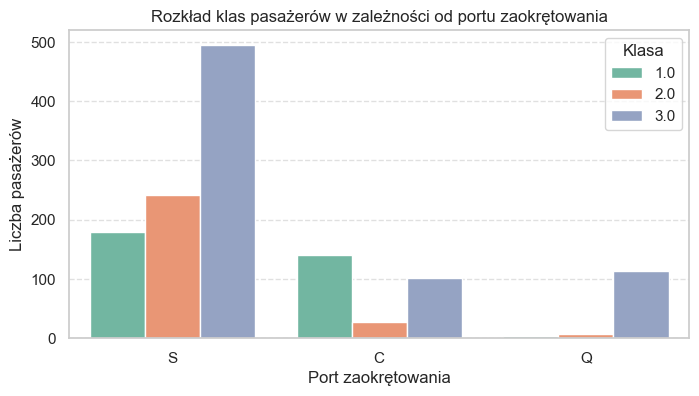

In [196]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_copy, x='embarked', hue='pclass', palette='Set2')
plt.title('Rozkład klas pasażerów w zależności od portu zaokrętowania')
plt.xlabel('Port zaokrętowania')
plt.ylabel('Liczba pasażerów')
plt.legend(title='Klasa')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

W Cherbourgu (C) dominowali pasażerowie 1 klasy, co wyjaśnia wysoką przeżywalność.

W Southampton (S) wsiadło najwięcej pasażerów, głównie z klasy 3, co tłumaczy niższą przeżywalność.

Port Queenstown (Q) obsługiwał przede wszystkim klasę 3 – wielu pasażerów z Irlandii i emigrantów.

### <span style="color:  #93bf99"> Miejsce docelowe podróży (home.dest)

Kolumna home.dest wskazuje docelowe miejsce podróży – najczęściej miasta w USA, ale też niektóre lokalizacje w Europie. Sprawdzimy, czy miejsce docelowe wiązało się z przeżywalnością oraz czy pasażerowie 1 klasy kierowali się do konkretnych miast.

In [153]:
# Tworzymy nową kolumnę: czy podróżował do USA
df_copy['to_usa'] = df_copy['home.dest'].str.contains('USA|New York|Los Angeles|Chicago|Washington|Philadelphia|San Francisco', case=False, na=False)

In [154]:
df_copy


name   title     sex  \
0                       Allen, Miss. Elisabeth Walton    Miss  female   
1                      Allison, Master. Hudson Trevor  Master    male   
2                        Allison, Miss. Helen Loraine    Miss  female   
3                Allison, Mr. Hudson Joshua Creighton      Mr    male   
4     Allison, Mrs. Hudson J C (Bessie Waldo Daniels)     Mrs  female   
...                                               ...     ...     ...   
1304                             Zabour, Miss. Hileni    Miss  female   
1305                            Zabour, Miss. Thamine    Miss  female   
1306                        Zakarian, Mr. Mapriededer      Mr    male   
1307                              Zakarian, Mr. Ortin      Mr    male   
1308                               Zimmerman, Mr. Leo      Mr    male   

          age  survived  sibsp  parch   body  pclass            cabin  ...  \
0     29.0000       1.0    0.0    0.0    NaN     1.0               B5  ...   
1      0.9167       1.0    1.0    2.0    NaN     1.0          C22 C26  ...   
2      2.0000       0.0    1.0    2.0    NaN     1.0          C22 C26  ...   
3     30.0000       0.0    1.0    2.0  135.0     1.0          C22 C26  ...   
4     25.0000       0.0    1.0    2.0    NaN     1.0          C22 C26  ...   
...       ...       ...    ...    ...    ...     ...              ...  ...   
1304  14.5000       0.0    1.0    0.0  328.0     3.0  Nieprzydzielona  ...   
1305  28.0000       0.0    1.0    0.0    NaN     3.0  Nieprzydzielona  ...   
1306  26.5000       0.0    0.0    0.0  304.0     3.0  Nieprzydzielona  ...   
1307  27.0000       0.0    0.0    0.0    NaN     3.0  Nieprzydzielona  ...   
1308  29.0000       0.0    0.0    0.0    NaN     3.0  Nieprzydzielona  ...   

      age_group cabin_section is_adult             group has_family  \
0       Dorośli             B     True  Reszta dorosłych      False   
1        Dzieci             C    False  Reszta dorosłych       True   
2        Dzieci             C    False  Reszta dorosłych       True   
3       Dorośli             C     True  Reszta dorosłych       True   
4       Dorośli             C     True  Reszta dorosłych       True   
...         ...           ...      ...               ...        ...   
1304     Dzieci             N    False  Reszta dorosłych       True   
1305    Dorośli             N     True  Reszta dorosłych       True   
1306    Dorośli             N     True  Reszta dorosłych      False   
1307    Dorośli             N     True  Reszta dorosłych      False   
1308    Dorośli             N     True  Reszta dorosłych      False   

     family_size group_size fare_per_person        fare_bin to_usa  
0            0.0          4           52.83  Drogi (30-100)  False  
1            3.0          6           25.26  Średni (10-30)  False  
2            3.0          6           25.26  Średni (10-30)  False  
3            3.0          6           25.26  Średni (10-30)  False  
4            3.0          6           25.26  Średni (10-30)  False  
...          ...        ...             ...             ...    ...  
1304         1.0          2            7.23      Tani (<10)  False  
1305         1.0          2            7.23      Tani (<10)  False  
1306         0.0          1            7.22      Tani (<10)  False  
1307         0.0          1            7.22      Tani (<10)  False  
1308         0.0          1            7.88      Tani (<10)  False  

[1309 rows x 26 columns]

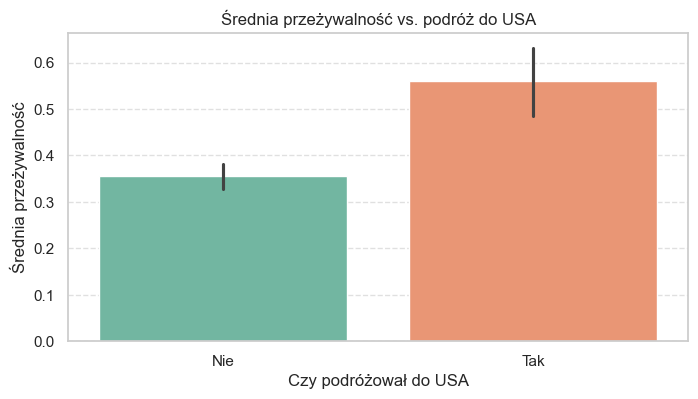

In [195]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_copy, x='to_usa', y='survived', hue='to_usa', palette='Set2', legend=False)
plt.title('Średnia przeżywalność vs. podróż do USA')
plt.xlabel('Czy podróżował do USA')
plt.ylabel('Średnia przeżywalność')
plt.xticks([0, 1], ['Nie', 'Tak'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Osoby podróżujące do USA miały wyraźnie wyższą przeżywalność – można przypuszczać, że byli to zamożniejsi pasażerowie (np. Amerykanie wracający do domu, obywatele USA), często w wyższych klasach.

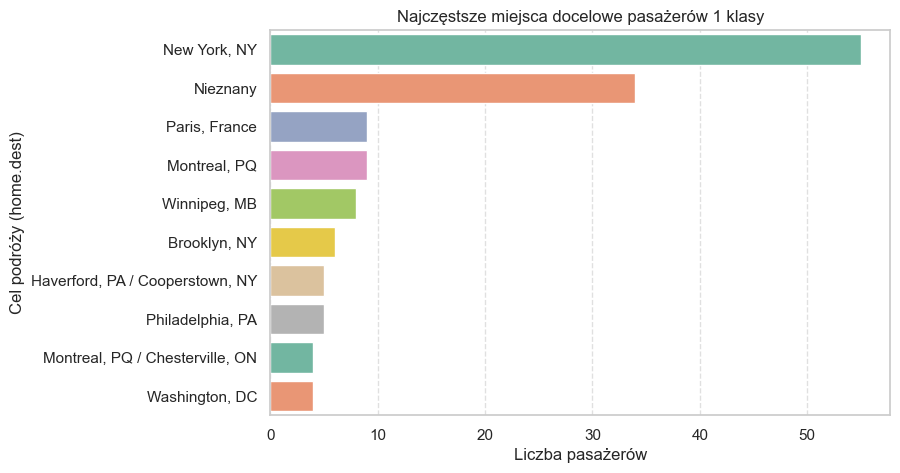

In [156]:
top_dest = df_copy[df_copy['pclass'] == 1]['home.dest'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=top_dest.index, x=top_dest.values, hue=top_dest.index,  palette='Set2', legend=False)
plt.title('Najczęstsze miejsca docelowe pasażerów 1 klasy')
plt.xlabel('Liczba pasażerów')
plt.ylabel('Cel podróży (home.dest)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Pasażerowie 1 klasy najczęściej kierowali się do wielkich amerykańskich miast, takich jak New York, Boston, Philadelphia, Los Angeles – co potwierdza hipotezę o ich statusie społecznym.

Możemy zauważyć, że cel podróży był powiązany z klasą oraz prawdopodobnie z poziomem zamożności – co mogło mieć wpływ na dostęp do szalup ratunkowych.

### <span style="color:  #93bf99"> Numer łodzi ratunkowej (boat)

Kolumna boat zawiera numery łodzi ratunkowych, do których przydzielono pasażerów. Brak informacji (nie przypisano łodzi) oznacza osoby, które nie zostały przypisane do żadnej łodzi (z dużym prawdopodobieństwem – osoby, które nie przeżyły).

Sprawdzimy m.in.:

Ile było użytych różnych łodzi?

Czy niektóre łodzie były bardziej „przepełnione” (czyli bardziej popularne)?

Czy konkretne klasy miały przypisane konkretne łodzie?

Czy wszystkie łodzie były używane równomiernie?

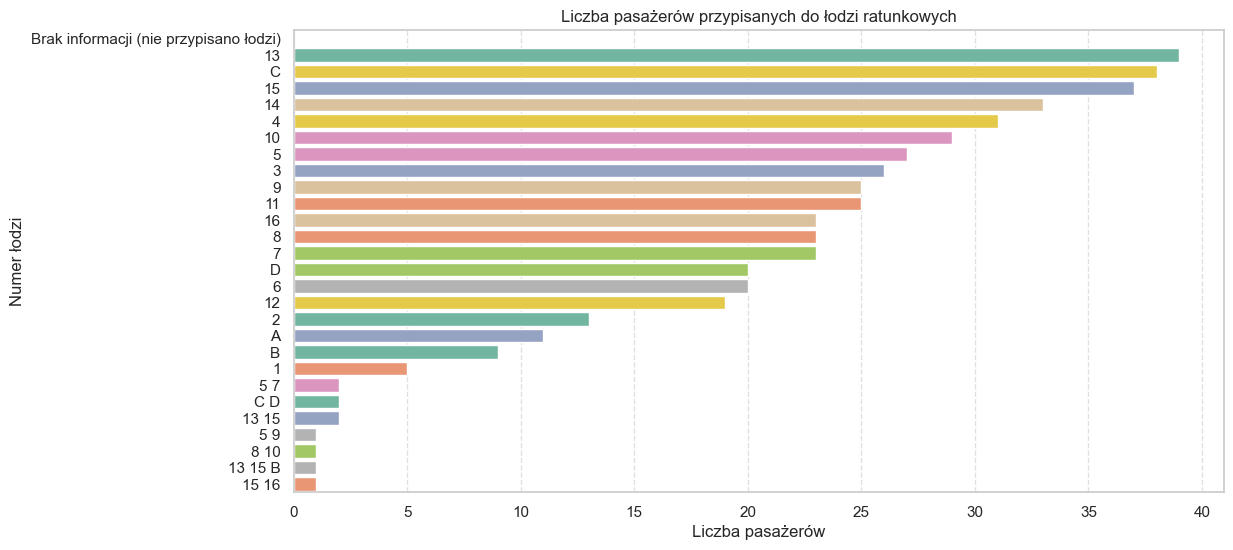

In [157]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df_copy[df_copy['boat'] != 'Brak informacji (nie przypisano łodzi)'],
    y='boat',
    hue='boat',
    order=df_copy['boat'].value_counts().index,
    palette='Set2',
    legend=False
)
plt.title('Liczba pasażerów przypisanych do łodzi ratunkowych')
plt.xlabel('Liczba pasażerów')
plt.ylabel('Numer łodzi')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Użyto co najmniej 27 różnych łodzi ratunkowych – niektóre były znacznie bardziej „obciążone” (np. łódź nr 13 lub 15).

Pasażerowie 1 klasy częściej mieli przypisaną łódź ratunkową, co wskazuje na lepszy dostęp do szalup.
Natomiast pasażerowie 3 klasy mieli zdecydowanie gorsze szanse na przydział do łodzi.

Podsumowująć łodzie nie były używane równomiernie – część z nich miała więcej pasażerów.

Klasa pasażera miała wpływ na przydział do łodzi (czyli także na przeżycie).

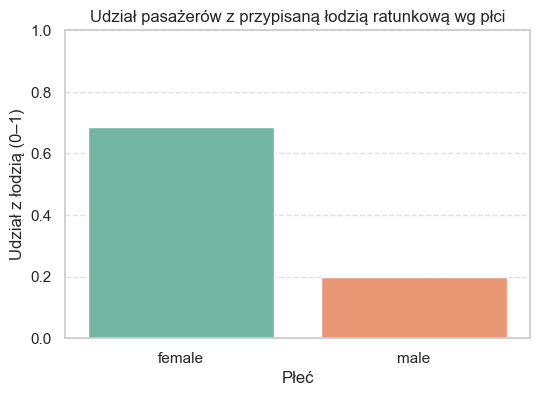

In [218]:
df_copy['has_boat'] = df_copy['boat'] != 'Brak informacji (nie przypisano łodzi)'

# Grupowanie: płeć vs. przypisanie do łodzi
boat_by_sex = df_copy.groupby('sex')['has_boat'].mean().reset_index()

# Wykres
plt.figure(figsize=(6,4))
sns.barplot(data=boat_by_sex, x='sex', y='has_boat', hue='sex', palette='Set2', legend=False)
plt.title('Udział pasażerów z przypisaną łodzią ratunkową wg płci')
plt.xlabel('Płeć')
plt.ylabel('Udział z łodzią (0–1)')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Kobiety miały znacznie większe szanse na przypisanie do łodzi ratunkowej niż mężczyźni. Potwierdza to zasadę: „kobiety i dzieci pierwsze” podczas ewakuacji.

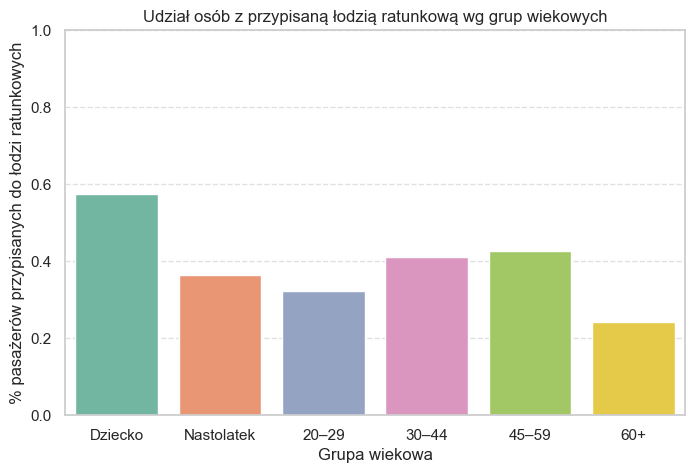

In [219]:
# Przedziały wiekowe
df_copy['age_group'] = pd.cut(df_copy['age'], bins=[0, 12, 18, 30, 45, 60, 80], 
                              labels=['Dziecko', 'Nastolatek', '20–29', '30–44', '45–59', '60+'])

# Grupowanie: wiek vs. łódź
boat_by_age = df_copy.groupby('age_group')['has_boat'].mean().reset_index()

# Wykres
plt.figure(figsize=(8,5))
sns.barplot(data=boat_by_age, x='age_group', y='has_boat', hue='age_group', palette='Set2', legend=False)
plt.title('Udział osób z przypisaną łodzią ratunkową wg grup wiekowych')
plt.xlabel('Grupa wiekowa')
plt.ylabel('% pasażerów przypisanych do łodzi ratunkowych')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Dzieci (0–12 lat) miały zdecydowanie większe szanse na przypisanie do łodzi ratunkowej, co pasuje do zasady „kobiety i dzieci pierwsze”.

Osoby w wieku 60+ miały mniejsze szanse na przypisanie do łodzi ratunkowej niż inne grupy wiekowe, co może wskazywać na:

- niższy priorytet ewakuacji,

- gorszą mobilność w sytuacjach kryzysowych, która utrudniała szybkie dotarcie do łodzi.


Osoby w wieku 20–44 lata również miały mniejsze szanse na przypisanie do łodzi, co sugeruje, że:

- były traktowane jako bardziej zdolne do samodzielnej ewakuacji,

- mogły pozostać na pokładzie w celu umożliwienia ewakuacji innych.

Dodatkowy wykres porównujący kobiety i dzieci vs. wszyscy inni

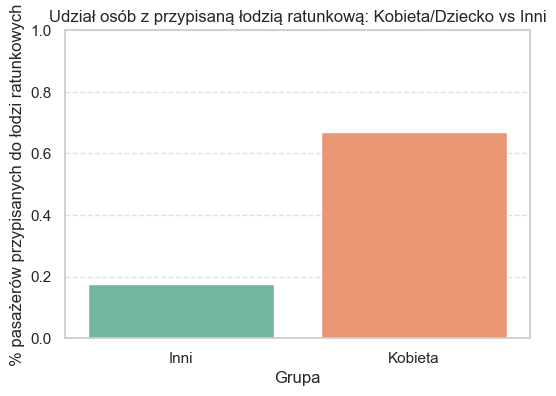

In [220]:
# Tworzymy nową kolumnę: 'kobiety i dzieci' vs 'wszyscy inni'
df_copy['women_and_children'] = df_copy['sex'].apply(lambda x: 'Kobieta' if x == 'female' else 'Inni')
df_copy.loc[df_copy['age'] <= 12, 'women_and_children'] = 'Kobieta'  # Dzieci też traktujemy jako "Kobieta"

# Grupujemy: czy jest przypisanie do łodzi vs. 'kobieta i dziecko' vs 'inni'
boat_by_group = df_copy.groupby('women_and_children')['has_boat'].mean().reset_index()

# Wykres
plt.figure(figsize=(6,4))
sns.barplot(data=boat_by_group, x='women_and_children', y='has_boat', hue='women_and_children', palette='Set2', legend=False)
plt.title('Udział osób z przypisaną łodzią ratunkową: Kobieta/Dziecko vs Inni')
plt.xlabel('Grupa')
plt.ylabel('% pasażerów przypisanych do łodzi ratunkowych')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Kobiety i dzieci mają zdecydowanie większy udział przypisania do łodzi – potwierdzenie zasady „kobiety i dzieci pierwsze”.

Inni (mężczyźni i osoby >12 lat): niższy udział przypisania do łodzi – co wskazuje na niższy priorytet ewakuacji.

### <span style="color:  #93bf99"> Numer ciała (body)

Zajmijmy się teraz analizą danych dla parametru body, który wskazuje na odnalezienie ciała pasażera po katastrofie.

Kolumna body zawiera numery ciał, które zostały odnalezione po katastrofie. Jeśli wartość jest NaN, oznacza to, że ciało nie zostało znalezione, a jeśli pojawi się liczba (np. 1, 2, 3...), oznacza to numer odnalezionego ciała. Celem jest analiza, czy istnieje jakikolwiek związek między odnalezieniem ciała a klasą pasażera, a także inne możliwe zależności. (sprawdzić macierz korelacji)

Analiza związku między odnalezieniem ciała a klasą pasażera

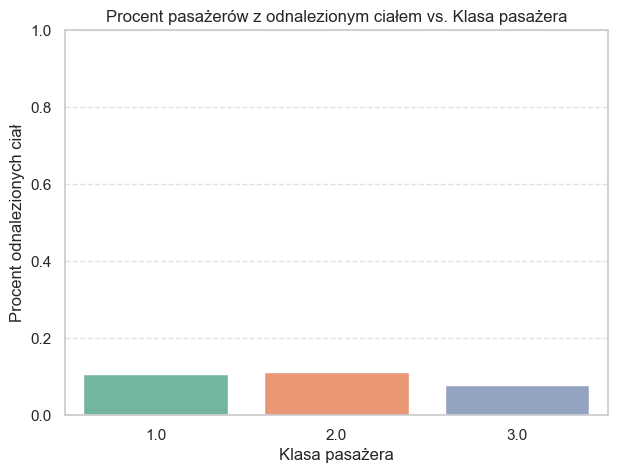

In [161]:
# Tworzymy nową kolumnę, która wskazuje, czy ciało zostało znalezione
df_copy['body_found'] = df_copy['body'].notna().astype(int)

# Grupujemy dane według klasy pasażera i sprawdzamy, jaki odsetek pasażerów z każdej klasy ma odnalezione ciało
body_by_class = df_copy.groupby('pclass')['body_found'].mean().reset_index()

# Wykres
plt.figure(figsize=(7,5))
sns.barplot(data=body_by_class, x='pclass', y='body_found', hue='pclass', palette='Set2', legend=False)
plt.title('Procent pasażerów z odnalezionym ciałem vs. Klasa pasażera')
plt.xlabel('Klasa pasażera')
plt.ylabel('Procent odnalezionych ciał')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Nie ma wyraźnej różnicy między w ilości odnalezionych ciał pasażerów poszczególnych klas

Pasażerowie drugiej klasy mieli najwyższy odsetek odnalezionych ciał spośród wszystkich klas. Może to wynikać z ich lokalizacji na statku – być może znajdowali się w rejonach, które zostały stosunkowo szybko przeszukane podczas akcji ratunkowej, albo ich ciała wypłynęły i zostały odnalezione w większej liczbie.

Pierwsza i trzecia klasa mają niższy odsetek odnalezionych ciał, przy czym trzecia klasa – najniższy:

W przypadku trzeciej klasy może to wynikać z trudniejszego dostępu do pokładów ewakuacyjnych i głębszego umiejscowienia kabin (ciała mogły pozostać we wraku).

W przypadku pierwszej klasy – możliwe, że więcej osób z tej grupy zostało uratowanych, więc liczba odnalezionych ciał była po prostu mniejsza.

# <span style="color: #93bf85"> EDA6  - analiza wartości odstających

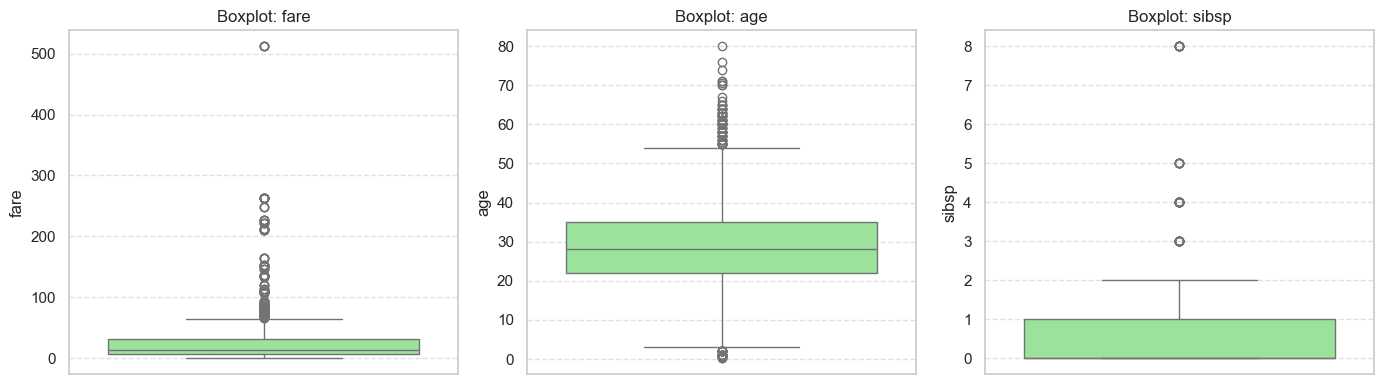

In [162]:
# Wybieramy kolumny numeryczne do analizy
columns_to_check = ['fare', 'age', 'sibsp']

# Boxploty – wizualna analiza odstających wartości
plt.figure(figsize=(14, 4))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df_copy, y=col, color='lightgreen')
    plt.title(f'Boxplot: {col}')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Zmienna koszt biletu (fare) – posiada dużo wartości odstających z prawej strony (tzw. prawoskośny rozkład). Kilkudziesięciu pasażerów zapłaciło więcej niż 100 funtów, co znacząco odstaje od typowego poziomu.

Wiek (age) – mniej wartości odstających, choć można dostrzec kilka osób w wieku powyżej 70 lat.

Rodzeństwo / małżonkowie (sibsp) – wyraźne odstające wartości powyżej 4–5. Większość pasażerów miała 0–1 osoby towarzyszące, ale pojawiają się większe grupy rodzinne.

# <span style="color: #93bf85"> WNIOSKI KOŃCOWE


1. Płeć pasażera miała zdecydowany wpływ na przeżywalność. Kobiety miały znacznie wyższy współczynnik przeżycia, co wskazuje na realizację zasady „kobiety i dzieci najpierw”.

2. Wiek również miał znaczenie – dzieci (0–12 lat) były znacznie częściej przypisane do łodzi ratunkowych, a pasażerowie w wieku 20–40 lat rzadziej. Seniorzy (60+) nie mieli szczególnie wysokiego udziału w grupie uratowanych – wbrew początkowym hipotezom.

3. Klasa biletu istotnie wpływała na szansę przeżycia. Pasażerowie 1 klasy przeżywali częściej niż pasażerowie klasy 3 – co może wynikać z lepszego dostępu do szalup ratunkowych i wyższej priorytetyzacji podczas ewakuacji.

4. Cena biletu korelowała z przeżywalnością – im wyższa cena, tym większe szanse przeżycia. Najdroższe bilety (powyżej 100 funtów) były rzadkie, ale miały bardzo wysoki współczynnik przeżycia. Tu jednak warto zaznaczyć, że niektórzy pasażerowie podróżowali grupowo na jednym bilecie – dlatego bardziej sprawiedliwym wskaźnikiem była średnia cena biletu na osobę. Nawet wtedy utrzymała się zależność: wyższy koszt na osobę = wyższe szanse na przeżycie.

5. Port zaokrętowania również miał pewien wpływ na przeżywalność. Najwyższe wskaźniki odnotowano wśród pasażerów wsiadających w Cherbourgu (C), co mogło wynikać z tego, że stamtąd wsiadało najwięcej pasażerów klasy 1.

6. Lokalizacja kabiny była silnie skorelowana z przeżyciem. Pasażerowie z kabinami oznaczonymi literami mieli znacznie większe szanse przeżycia. Osoby bez przydzielonej kabiny (oznaczone jako „Nieprzydzielona”) przeżywały zdecydowanie rzadziej.

7. Większość pasażerów z miejscem docelowym w Ameryce Północnej pochodziła z klasy 1. To sugeruje, że podróżowali w celach biznesowych lub migracyjnych, dysponując większymi środkami finansowymi – co mogło wpływać na ich szanse przeżycia.

8. Analiza łodzi ratunkowych pokazała, że nie wszystkie łodzie były wykorzystywane w równym stopniu. Obecność w łodzi ratunkowej zależała od płci i wieku. Kobiety i dzieci miały znacznie wyższy udział, co potwierdza wcześniejsze wnioski. Zastosowana zasada pierwszeństwa była respektowana – choć nie zawsze konsekwentnie.